In [1]:
import pandas as pd

# Exportamos datos

data_xy = pd.read_csv('csv/DataFinal.csv')

# 1. Preprocesado de los datos

Mapeamos los valores de posiciones a valores numéricos.

In [2]:
unique_values = data_xy['Posicion'].unique()
print(unique_values)

['DL' 'DF' 'CC,DL' 'DL,CC' 'DF,CC' 'CC' 'CC,DF' 'PO' 'DF,DL' 'DL,DF']


La idea es crear cuatro variables binarias nuevas, que indiquen si el jugador juega o no es esa posición.

In [3]:
# Codificamos las posiciones
data_xy['Posicion_1'] = data_xy['Posicion'].str.contains('PO') # Verdadero si el jugador es portero
data_xy['Posicion_2'] = data_xy['Posicion'].str.contains('DF') # Verdadero si el jugador es defensa
data_xy['Posicion_3'] = data_xy['Posicion'].str.contains('CC') # Verdadero si el jugador es centrocampista
data_xy['Posicion_4'] = data_xy['Posicion'].str.contains('DL') # Verdadero si el jugador es delantero

data_xy.head()

,Jugador,Edad,Temporada,Posicion,Valor liga ini,Partidos,Titularidades,Minutos,Goles,Asistencias,...,Salario semanal,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_1,Posicion_2,Posicion_3,Posicion_4
0,Aaron Connolly,19.0,2019,DL,5123.0,24.0,14.0,1258.0,3.0,1.0,...,31990.0,5123.0,15.0,15.0,200.78,200.78,False,False,False,True
1,Adam Webster,24.0,2019,DF,5123.0,31.0,31.0,2668.0,3.0,1.0,...,48519.0,5123.0,15.0,15.0,200.78,200.78,False,True,False,False
2,Alexis Mac Allister,20.0,2019,"CC,DL",5123.0,9.0,4.0,352.0,0.0,0.0,...,42653.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
3,Alireza Jahanbakhsh,25.0,2019,"DL,CC",5123.0,10.0,3.0,311.0,2.0,0.0,...,69312.0,5123.0,15.0,15.0,200.78,200.78,False,False,True,True
4,Bernardo,24.0,2019,"DF,CC",5123.0,14.0,7.0,679.0,0.0,0.0,...,34656.0,5123.0,15.0,15.0,200.78,200.78,False,True,True,False


Eliminamos a los porteros del conjunto.

In [4]:
data_xy = data_xy[data_xy['Posicion_1'] != True]

Eliminamos también las características relacionadas con ellos.

In [5]:
data_xy = data_xy.drop(['Goles encajados', 'Disparos recibidos', 'Salvadas', 'Porterias a cero', 
                        'Posicion_1', 'Penaltis en contra', 'Penaltis encajados', 'Penaltis detenidos', 'Penaltis fallados (en contra)'], axis=1)

In [6]:
nombres_de_columnas = data_xy.columns
nombres_de_columnas

Index(['Jugador', 'Edad', 'Temporada', 'Posicion', 'Valor liga ini',
       'Partidos', 'Titularidades', 'Minutos', 'Goles', 'Asistencias',
       'Goles penalti', 'Penaltis lanzados', 'Amarillas', 'Rojas', 'xG',
       'xG sin penaltis', 'xAG', 'Conducciones progresivas',
       'Pases progresivos', 'Pases progresivos recibidos', '2a amarilla',
       'Faltas cometidas', 'Faltas recibidas', 'Fueras de juego',
       'Balones centrados', 'Intercepciones', 'Entradas ganadas',
       'Penaltis concedidos', 'Goles en propia', 'Recuperaciones',
       'Aereos ganados', 'Aereos perdidos', 'Disparos', 'Tiros a puerta',
       'Distancia tiros', 'Faltas lanzadas', 'Pases completados',
       'Pases intentados', 'Distancia pases', 'Dist progresiva pases',
       'Pases cortos completados', 'Pases cortos intentados',
       'Pases medios completados', 'Pases medios intentados',
       'Pases largos completados', 'Pases largos intentados', 'Pases clave',
       'Pases ultimo tercio', 'Pases al a

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split # para dividir el dataset en los conjuntos de train y test

x = data_xy.drop(['Jugador', 'Temporada', 'Salario semanal', 'Posicion'], axis=1)
y = data_xy['Salario semanal']

print("El número de instancias del problema es: " + str(x.shape[0]))

print("El número de características del problema es: " + str(x.shape[1]))

# Capturamos los índices de las características continuas y categóricas
categoricas_indices = ['Posicion_2', 'Posicion_3', 'Posicion_4']
continuas_indices = [col for col in x.columns if col not in categoricas_indices]

El número de instancias del problema es: 9872
El número de características del problema es: 64


# 2. Análisis de los datos

Separamos en test y train para evitar data snooping.

In [9]:
# Antes de cualquier visualización separamos en entrenamiento y test (para no hacer nada con test y evitar el data snooping)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

# Visualizamos los datos de entrenamiento
print('El número de instancias para el entrenamiento es: ', x_train.shape[0])
print('El número de instancias para el test es: ' , x_test.shape[0])

El número de instancias para el entrenamiento es:  8391
El número de instancias para el test es:  1481


Como tenemos un dataset de tamaño medio selecciono el 15% de la muestra para test, para así tener una buena cantidad de datos para entrenar nuestros modelos y bastantes datos para luego comprobar como funcionaría el modelo elegido para datos de fuera de la muestra.

Resumen de los datos.

In [10]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo, mínimo y valores faltantes
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo', 'Valores Faltantes'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

print("TABLA RESUMEN DE LAS VARIABLES CATEGÓRICAS\n")
# Calcular el número de ejemplos, rango de valores y valores faltantes
resultados = pd.DataFrame(columns=['Número de Ejemplos', 'Rango de Valores', 'Valores Faltantes'])
for columna in categoricas_indices:
    numero_ejemplos = x_train[columna].count()
    rango_valores = f"{x_train[columna].min()} - {x_train[columna].max()}"
    valores_faltantes = x_train[columna].isnull().sum()
    resultados.loc[columna] = [numero_ejemplos, rango_valores, valores_faltantes]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados)

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                                Media  Mediana  Desviación Típica   Máximo  Mínimo  Valores Faltantes
Edad                            25.04     25.0               4.18     41.0    15.0                0.0
Valor liga ini                3317.78   3114.0            1434.60   6605.0  1598.0                0.0
Partidos                        23.13     25.0              10.00     50.0     1.0                0.0
Titularidades                   17.80     18.0              10.60     38.0     0.0                0.0
Minutos                       1588.99   1616.0             904.09   3420.0     1.0                0.0
Goles                            2.57      1.0               3.95     41.0     0.0                0.0
Asistencias                      1.78      1.0               2.35     21.0     0.0                0.0
Goles penalti                    0.24      0.0               0.89     12.0     0.0                0.0
Penaltis lanzados                0.30   

Respecto a los datos continuos, podemos observar por un lado que algunas variables tienen intervalos muy grandes, convendría escalarlos para facilitar el trabajo de los modelos de aprendizaje, en especial modelos como KNN que trabajan con las distancias entre puntos. Por otro lado podemos observar también que no existen datos faltantes.

En cuanto a las variables categóricas observamos simplemente el resultado de haber aplicado dummy encoding a las mismas, nos ha creado una serie de variables binarias donde se almacena la información acerca de posición y competiciones del jugador en cuestión.

Histograma con la cantidad de jugadores por posición.

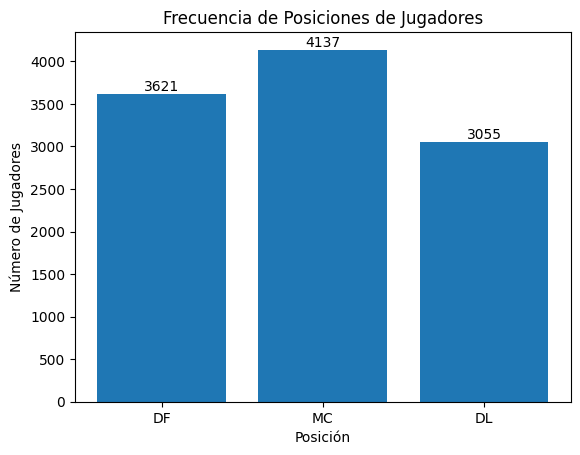

In [12]:
import matplotlib.pyplot as plt

# Calcular la cantidad de jugadores por posición
frecuencia_posiciones = x_train[['Posicion_2', 'Posicion_3', 'Posicion_4']].sum(axis=0)

# Crear una figura y un eje
fig, ax = plt.subplots()
tags = ['DF', 'MC', 'DL']

# Añadir barras al gráfico
ax.bar(tags, frecuencia_posiciones)

# Configurar etiquetas y título
ax.set_xlabel('Posición')
ax.set_ylabel('Número de Jugadores')
ax.set_title('Frecuencia de Posiciones de Jugadores')

# Añadir etiquetas con el número exacto de jugadores encima de las barras
for i, count in enumerate(frecuencia_posiciones):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Podemos observar que tenemos una cantidad bastante reducida de delanteros en comparación con el resto de posiciones, no obstante creo que es una cantidad significativa de muestras.

Distribución de salarios por posición.

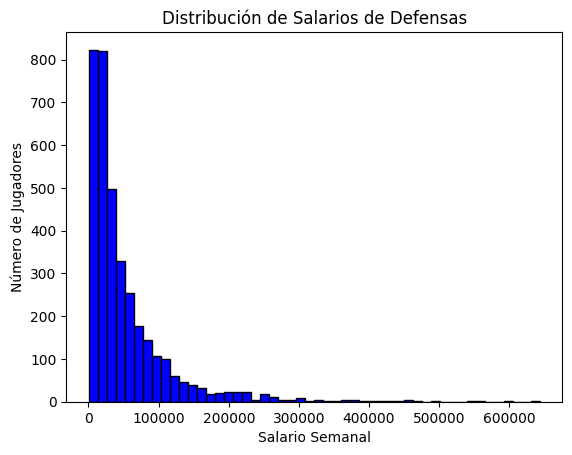

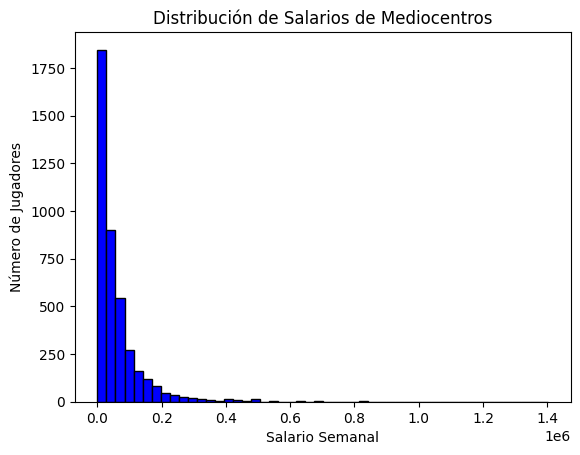

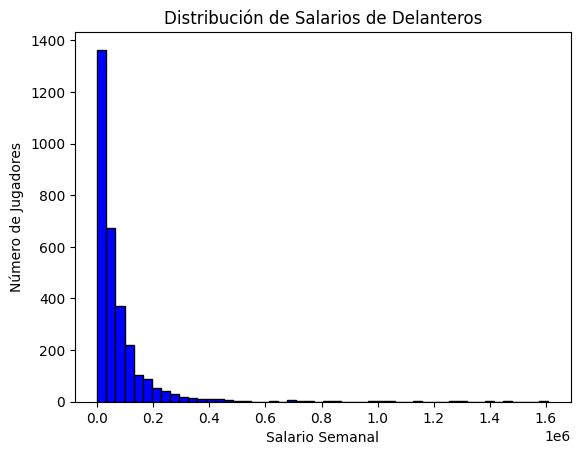

In [13]:
# Índices por posición
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]

salarios = y_train

# Crea un histograma de los salarios
# Defensas
plt.hist(salarios[c2], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.hist(salarios[c3], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.hist(salarios[c4], bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

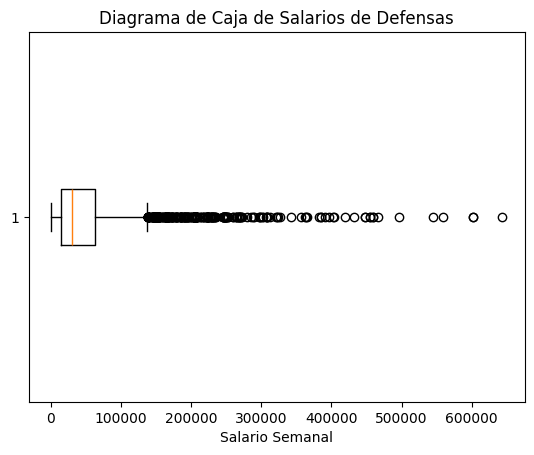

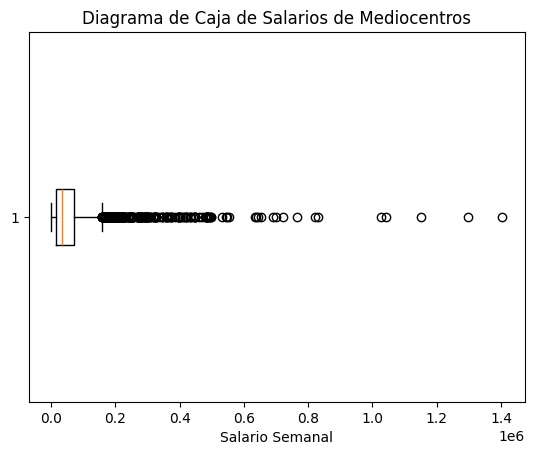

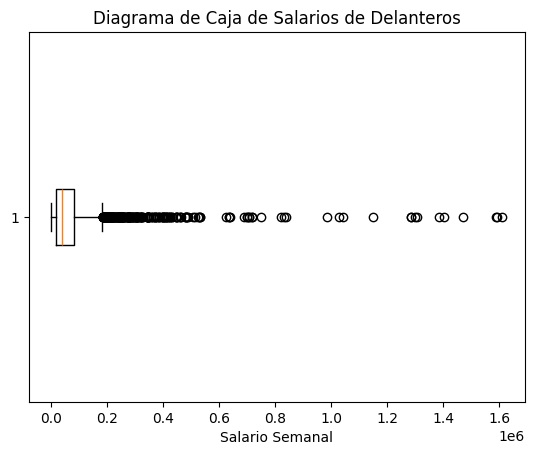

In [14]:
# Crea un diagrama de caja de los salarios
# Defensas
plt.boxplot(salarios[c2], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Defensas')

# Muestra el gráfico
plt.show()

# Mediocentros
plt.boxplot(salarios[c3], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Mediocentros')

# Muestra el gráfico
plt.show()

# Delanteros
plt.boxplot(salarios[c4], vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Delanteros')

# Muestra el gráfico
plt.show()

Podemos ver que para todas las posiciones existen salarios que están muy por encima de la media, aunque en distintas magnitudes dependiendo de la posición, vemos que los delanteros son los que más cobran y los porteros los que menos.

In [15]:
# Define las columnas y los índices para el DataFrame
indices = ['Defensa', 'Mediocentro', 'Delantero', 'Total']
columnas = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Crea un DataFrame con los cuartiles
cuartiles_df = pd.DataFrame(index=indices, columns=columnas)

# Llena el DataFrame con los cuartiles
cuartiles_df.loc['Defensa', :] = y_train[c2].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Mediocentro', :] = y_train[c3].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Delantero', :] = y_train[c4].describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values
cuartiles_df.loc['Total', :] = y_train.describe(percentiles=[0.25, 0.5, 0.75]).loc[columnas].values

# Muestra el DataFrame
cuartiles_df

,count,mean,std,min,25%,50%,75%,max
Defensa,3621.0,51444.140017,62971.462996,296.0,14307.0,30082.0,63462.0,643199.0
Mediocentro,4137.0,60749.197003,87972.337447,296.0,14307.0,33588.0,71821.0,1403262.0
Delantero,3055.0,74253.281178,124423.939725,296.0,16532.5,39175.0,83317.0,1609609.0
Total,8391.0,62380.8266,94239.093516,296.0,15115.5,33690.0,73996.0,1609609.0


Aquí vemos más claro la diferencia del salario máximo entre posiciones, viendolo así observamos que la diferencia entre salarios de defensas y centrocampistas no es muy grande, al igual que la media, y que verdaderamente la posición más outlier es la de delantero.

Distribución en cuartiles y de gráfico de barras de la variable a predecir.

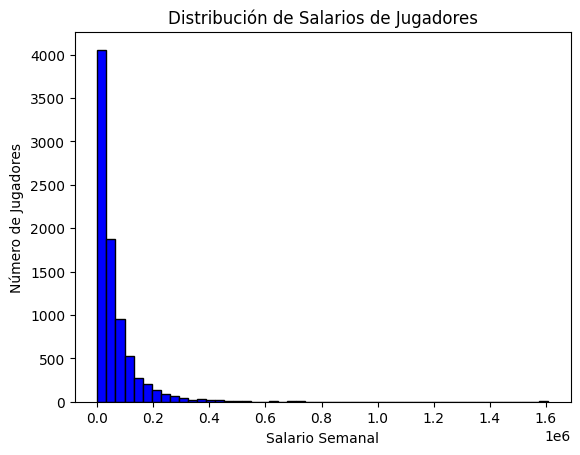

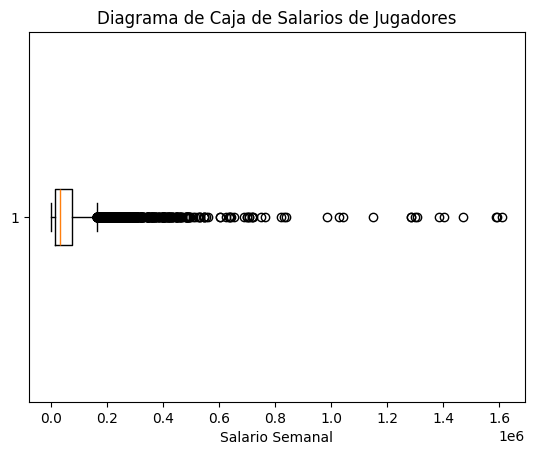

count    8.391000e+03
mean     6.238083e+04
std      9.423909e+04
min      2.960000e+02
25%      1.511550e+04
50%      3.369000e+04
75%      7.399600e+04
max      1.609609e+06
Name: Salario semanal, dtype: float64


In [16]:
# Crea un histograma de los salarios
plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Crea un diagrama de caja de los salarios
plt.boxplot(salarios, vert=False)
plt.xlabel('Salario Semanal')
plt.title('Diagrama de Caja de Salarios de Jugadores')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

**Conclusiones**

* Se cumple ley de la potencia, muchos valores pequeños, pero probabilidad de obtener algunos valores muy grandes, como se puede observar en el gráfico de barras o en el de caja.
* Los 3 percentiles están a distancias similares unos de otros, así como con el valor mínimo, hasta aquí bastante balanceados los datos. Existe no obstante una distancia mucho mayor con respecto al máximo.
* Tanto en el diagrama de caja como en el de barras se puede observar fácilmente que existe una cantidad significativa de jugadores con sueldos mucho mayores a los de la mayoría.

Escalamos logarítmicamente la variable a predecir, para paliar el efecto de la cola alargada y mejorar la distribución de valores de la variable.

https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

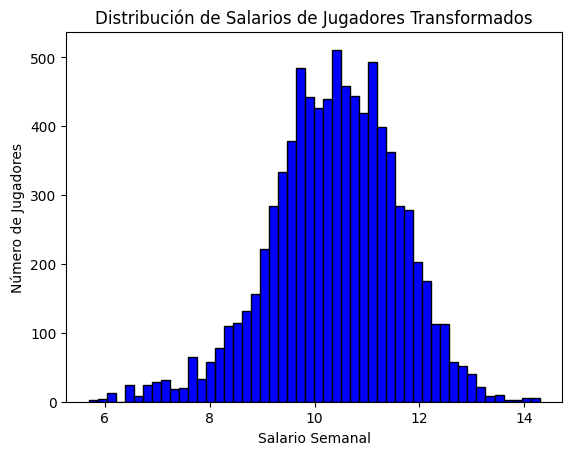

count    8391.000000
mean       10.376449
std         1.215846
min         5.693732
25%         9.623542
50%        10.424986
75%        11.211780
max        14.291502
Name: Salario semanal, dtype: float64


In [17]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Crea un histograma de los salarios
salarios = y_train_log

plt.hist(salarios, bins=50, color='blue', edgecolor='black')

# Agrega etiquetas y título
plt.xlabel('Salario Semanal')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Salarios de Jugadores Transformados')

# Muestra el gráfico
plt.show()


# Distribución de cuartiles
cuartiles = y_train_log.describe(percentiles=[0.25, 0.5, 0.75])

# Muestra la distribución de cuartiles
print(cuartiles)

Ahora la distribución se asemeja mucho más a la distribución gaussiana, lo que puede ayudar al entrenamiento de los modelos y todos los percentiles están mucho más equilibrados, lo que ayuda a evitar que valores atípicos o extremos influyan más de lo debido en la construcción del modelo.

Observamos distribución de datos antes de tratar.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

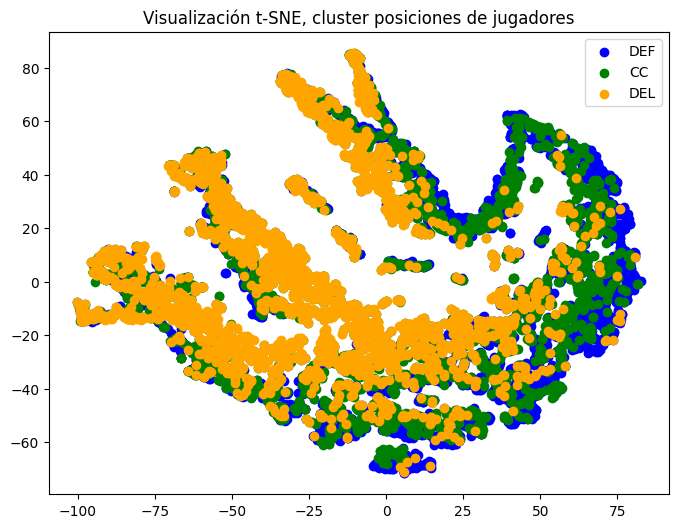

In [18]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train)

# Colores para cada condición
c2 = x_train["Posicion_2"]
c3 = x_train["Posicion_3"]
c4 = x_train["Posicion_4"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_2'
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="DEF", c='blue')

# Scatter plot para 'Posicion_3'
plt.scatter(X_tsne[c3 == 1, 0], X_tsne[c3 == 1, 1], label="CC", c='green')

# Scatter plot para 'Posicion_4'
plt.scatter(X_tsne[c4 == 1, 0], X_tsne[c4 == 1, 1], label="DEL", c='orange')

plt.title("Visualización t-SNE, cluster posiciones de jugadores")

# Agregar leyenda
plt.legend(loc="upper right")

plt.show()

Vemos que más o menos todos los clusters están juntos, voy a ir observando las distintas posiciones por separado para ver si puedo confirmarlo.

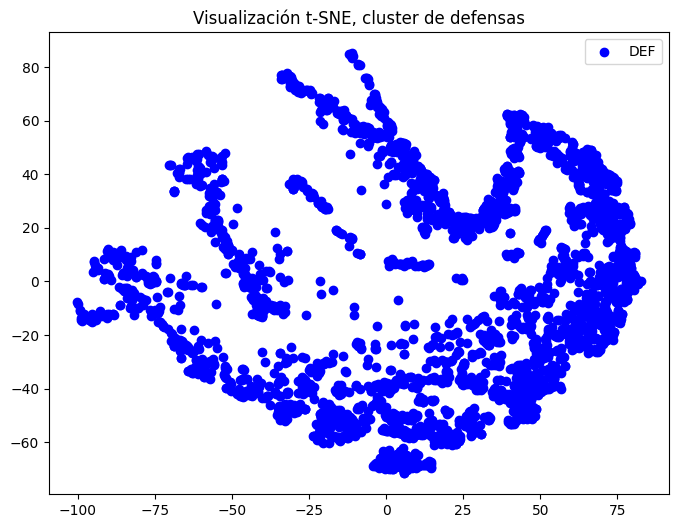

In [19]:
plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_2'
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="DEF", c='blue')

plt.title("Visualización t-SNE, cluster de defensas")
plt.legend(loc='upper right')
plt.show()

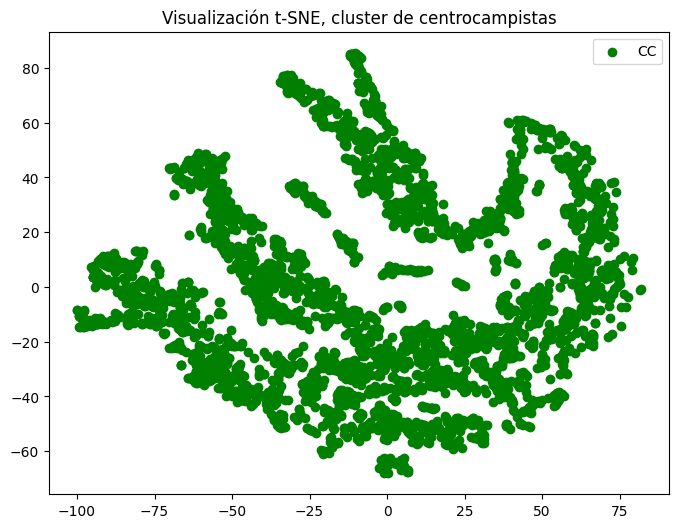

In [20]:
plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_3'
plt.scatter(X_tsne[c3 == 1, 0], X_tsne[c3 == 1, 1], label="CC", c='green')

plt.title("Visualización t-SNE, cluster de centrocampistas")
plt.legend(loc='upper right')
plt.show()

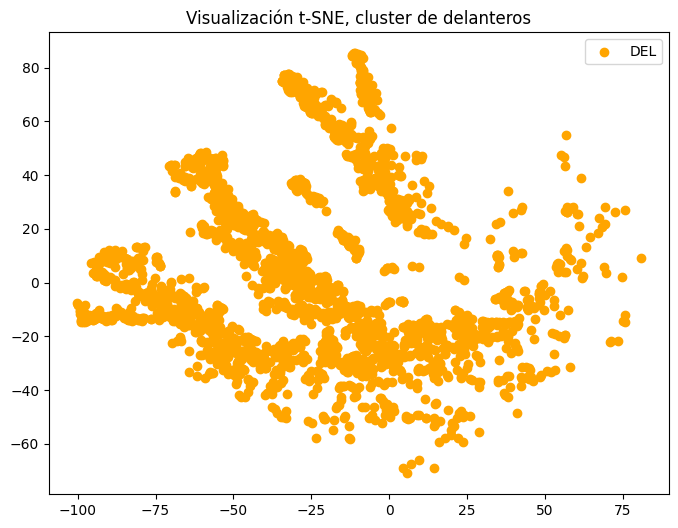

In [21]:
plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_4'
plt.scatter(X_tsne[c4 == 1, 0], X_tsne[c4 == 1, 1], label="DEL", c='orange')

plt.title("Visualización t-SNE, cluster de delanteros")
plt.legend(loc='upper right')
plt.show()

A continuación vamos a normalizar los datos. Esto es importante para que estén todos en un mismo rango de valores. La importancia de escalarlos es:

*   Evitar que algunas características dominen sobre otras
*   Mejorar la convergencia en algunos algoritmos como descenso de gradiente

Las variables categóricas ya se mueven en un rango entre 0 y 1 por tanto solo vamos a normalizar las variables continuas. Para ello utilizaremos el método de normalización que consiste en para cada valor x de la columna, restarle el mínimo de la columna y dividir entre el máximo menos el mínimo de la columna:
<center> $z = \frac{{x - x_{min}}}{{x_{max}-x_{min}}}$ </center>

Las variables del test también se normalizan y para ello se utilizan los factores usados en entrenamiento para normalizar.

----

Para estandarizar las variables utilizaremos las siguientes funciones de scikit-learn:

**MinMaxScaler().fit(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se guardan los factores de mínimo y máximo de X en la clase MinMaxScaler

---

**MinMaxScaler().transform(X)** donde X es el conjunto de datos a normalizar

Tras llamar a la función se transforma X con los factores de mínimo y máximo de la clase MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler # para normalizar

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador utilizando los datos de train
scaler.fit(x_train[continuas_indices])

# Escalamos train y test con los factores de train
x_train[continuas_indices] = scaler.transform(x_train[continuas_indices])
x_test[continuas_indices] = scaler.transform(x_test[continuas_indices])

Comprobamos que se ha normalizado bien mediante un resumen de las variables continuas.

In [26]:
print("TABLA RESUMEN DE LAS VARIABLES CONTINUAS\n")
# Calcular la media, mediana, desviación estándar, máximo y mínimo
resultados = pd.DataFrame(columns=['Media', 'Mediana', 'Desviación Típica', 'Máximo', 'Mínimo'])
for columna in continuas_indices:
    media = round(x_train[columna].mean(), 2)
    mediana = round(x_train[columna].median(), 2)
    desviacion_tipica = round(x_train[columna].std(), 2)
    maximo = round(x_train[columna].max(), 2)
    minimo = round(x_train[columna].min(), 2)
    resultados.loc[columna] = [media, mediana, desviacion_tipica, maximo, minimo]

# Imprimir la tabla de resultados
tabla_resultados = resultados.to_string(index=True)
print(tabla_resultados + "\n")

TABLA RESUMEN DE LAS VARIABLES CONTINUAS

                             Media  Mediana  Desviación Típica  Máximo  Mínimo
Edad                          0.39     0.38               0.16     1.0     0.0
Valor liga ini                0.34     0.30               0.29     1.0     0.0
Partidos                      0.45     0.49               0.20     1.0     0.0
Titularidades                 0.47     0.47               0.28     1.0     0.0
Minutos                       0.46     0.47               0.26     1.0     0.0
Goles                         0.06     0.02               0.10     1.0     0.0
Asistencias                   0.08     0.05               0.11     1.0     0.0
Goles penalti                 0.02     0.00               0.07     1.0     0.0
Penaltis lanzados             0.02     0.00               0.08     1.0     0.0
Amarillas                     0.20     0.18               0.17     1.0     0.0
Rojas                         0.04     0.00               0.11     1.0     0.0
xG        

Comprobar correlación de las variables continuas.

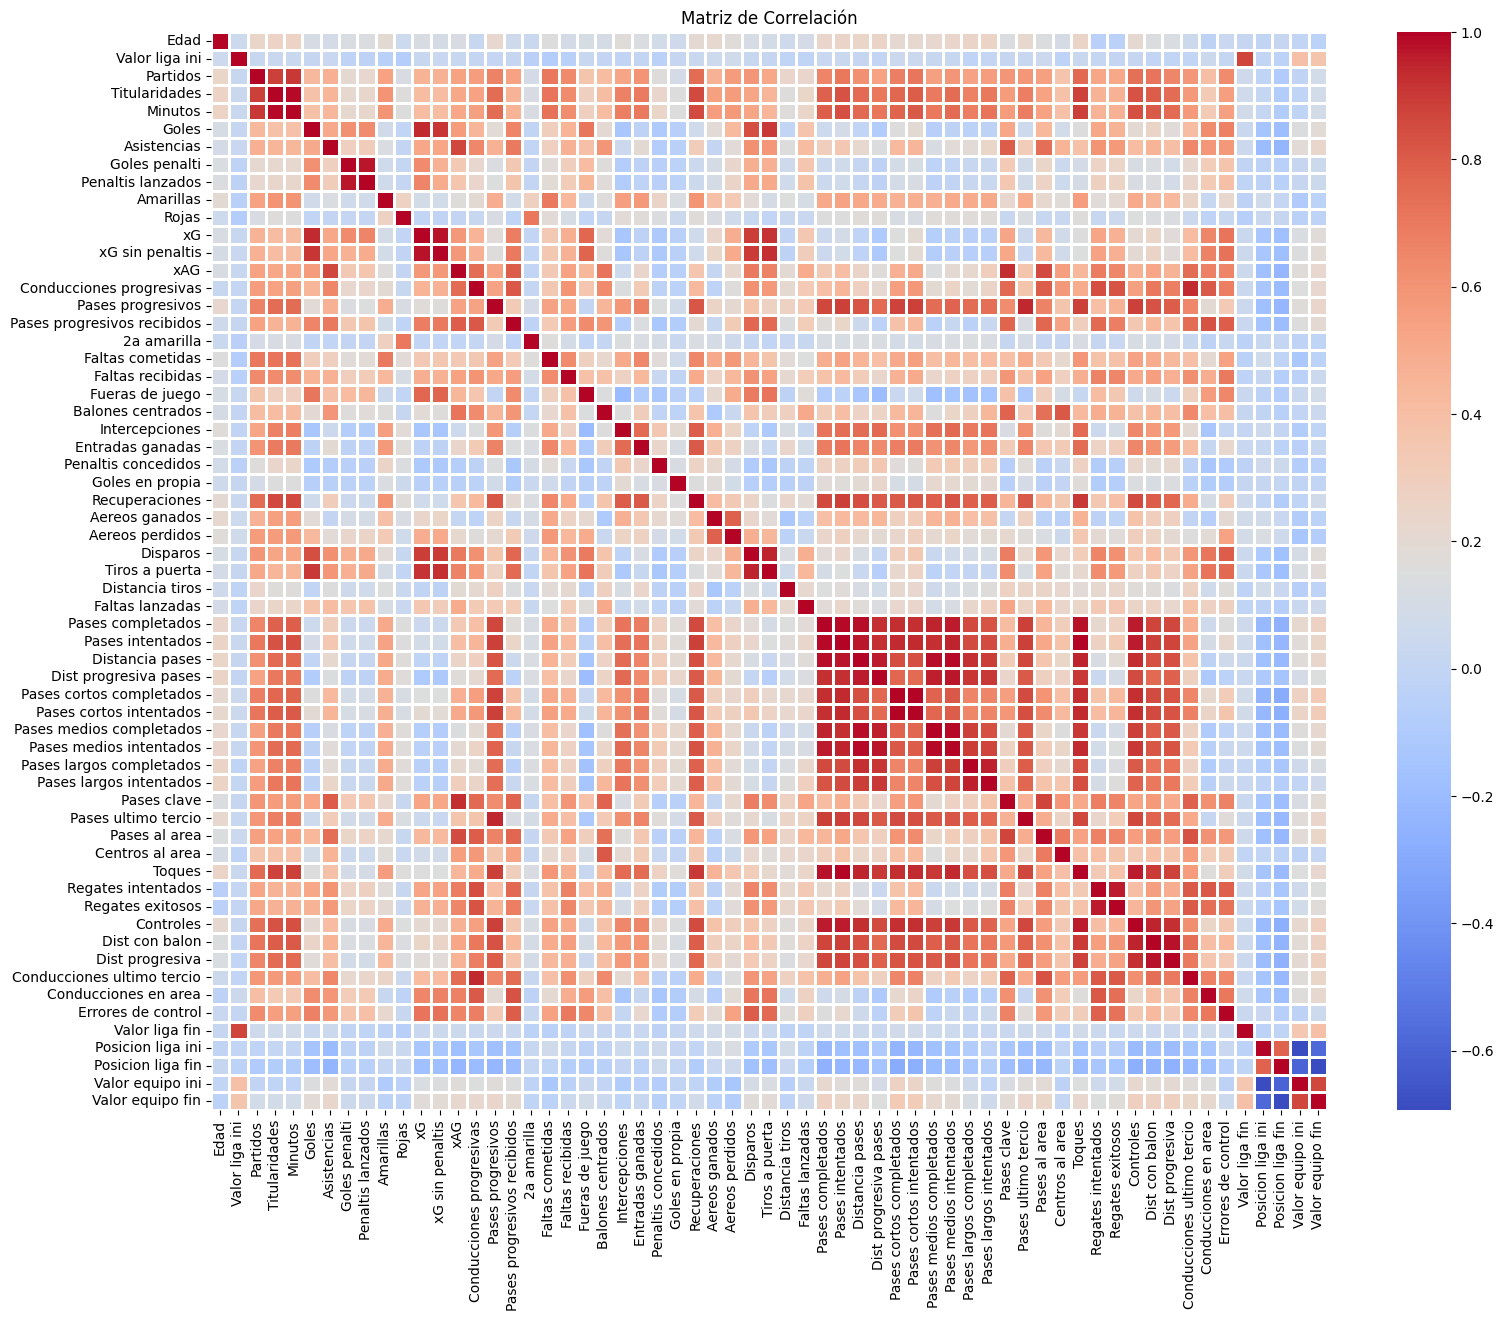

In [27]:
import seaborn as sns

# Calcula la matriz de correlación
matriz_correlacion = x_train[continuas_indices].corr()

# Visualiza la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(18, 14))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', linewidths=2)
plt.title('Matriz de Correlación')
plt.show()

In [28]:
# Encuentra parejas de características con alta correlación
umbral = 0.99

parejas_relacionadas = set()  # Usamos un conjunto para evitar duplicados
nombres_caracteristicas = matriz_correlacion.columns

for i in range(len(nombres_caracteristicas)):
    for j in range(i + 1, len(nombres_caracteristicas)):
        if abs(matriz_correlacion.iloc[i, j]) > umbral:
            pareja = (nombres_caracteristicas[i], nombres_caracteristicas[j])
            parejas_relacionadas.add(pareja)

# Imprime las parejas de características relacionadas
print("Parejas de características con correlación mayor a {}:".format(umbral))
for pareja in parejas_relacionadas:
    print(pareja)

Parejas de características con correlación mayor a 0.99:
('Pases intentados', 'Toques')
('Pases completados', 'Pases intentados')
('Pases cortos completados', 'Pases cortos intentados')
('Pases medios completados', 'Pases medios intentados')
('Titularidades', 'Minutos')


Selecciono un 99% de correlación ya que considero que eliminando una de estas variables se puede mantener prácticamente la totalidad de la información y conseguimos reducir la dimensionalidad del problema.

Variables correlacionadas:
* ('Titularidades', 'Minutos'): Es entendible la correlación, 1 titularidad suele equivaler a jugar entre 60' y 90'. Veo coherente entonces eliminar 'Titularidades', ya que su información está prácticamente implícita en 'Minutos'.
* ('Pases medios completados', 'Pases medios intentados'): Estas variables hacen referencia a la cantidad de pases de media distancia intentados y completados, la correlación puede deberse a que al final todos los futbolistas tienen una precisión similar para este tipo de pases, fallando así un porcentaje similar de pases y generandose así esta correlación. No obstante creo que mantener ambas variables puede ser bueno, ya que en este caso me gustaría mantener toda la información extra porque al final aunque los porcentajes de precisión sean similares, estos no son idénticos y es interesante que el modelo los tenga en cuenta.
* ('Pases cortos completados', 'Pases cortos intentados'): Misma explicación que las variables anteriores, solo que en este caso son pases cortos.
* ('Pases completados', 'Pases intentados'): Misma explicación que las variables anteriores.
* ('Pases intentados', 'Toques'): Aquí se correlacionan el número de pases intentados por un jugador con el número de toques dado por el jugador, entiendo que por como es el fútbol hoy en día donde los jugadores no suelen retener mucho el balón y se suele controlar y pasar, se puede correlacionar ambas variables, aunque sigo creyendo que ambas proporcionan su propia información, por lo que no eliminaría ninguna de las dos.

In [29]:
# Eliminamos 'Titularidades' por estar correlacionada con 'Minutos'
x_train = x_train.drop('Titularidades', axis=1)
x_test = x_test.drop('Titularidades', axis=1)

continuas_indices.remove('Titularidades')

x_train.head()

,Edad,Valor liga ini,Partidos,Minutos,Goles,Asistencias,Goles penalti,Penaltis lanzados,Amarillas,Rojas,...,Conducciones en area,Errores de control,Valor liga fin,Posicion liga ini,Posicion liga fin,Valor equipo ini,Valor equipo fin,Posicion_2,Posicion_3,Posicion_4
3994,0.307692,0.003196,0.469388,0.472360,0.00000,0.000000,0.0,0.0,0.176471,0.00,...,0.007143,0.049296,0.003196,0.052632,0.058824,0.662710,0.659130,True,False,False
9474,0.538462,0.018774,0.591837,0.733548,0.02439,0.523810,0.0,0.0,0.117647,0.00,...,0.221429,0.661972,0.018774,1.000000,1.000000,0.019042,0.059760,False,True,True
5882,0.538462,1.000000,0.673469,0.783270,0.00000,0.285714,0.0,0.0,0.235294,0.00,...,0.200000,0.464789,1.000000,0.315789,0.352941,0.410426,0.404168,True,False,False
9800,0.307692,0.335331,0.673469,0.886224,0.02439,0.095238,0.0,0.0,0.294118,0.00,...,0.014286,0.112676,0.335331,0.000000,0.000000,0.633464,0.629574,True,False,False
8554,0.423077,0.200120,0.469388,0.447792,0.00000,0.047619,0.0,0.0,0.411765,0.25,...,0.007143,0.042254,0.200120,0.894737,1.000000,0.081112,0.071358,True,False,False


# 3. Procesado de los datos

Ahora vamos a aplicar el Análisis de Componentes Principales (PCA) sobre nuestras variables continuas para intentar reducir la dimensionalidad de nuestro conjunto de datos mientras se mantiene la información relevante de los datos originales.

He probado a usar FAMD, que es un equivalente de PCA que se puede aplicar tanto a variables categóricas como continuas, pero simplemente reducía a 51 características y no comprendía del todo su funcionamiento por lo que preferí usar PCA.

Cuando whiten se establece en True, PCA realiza una transformación adicional después de calcular los componentes principales. Esta transformación divide cada componente principal por la raíz cuadrada de su autovalor correspondiente. El resultado es que los componentes principales tendrán varianza unitaria, lo que puede ser útil en ciertas aplicaciones.

Por lo tanto, la opción whiten es útil cuando se desea que los componentes principales tengan varianza unitaria y es especialmente útil en aplicaciones donde la escala de las características es importante o donde se desea que los componentes principales tengan la misma escala para facilitar la interpretación.

Número de variables continuas:  60


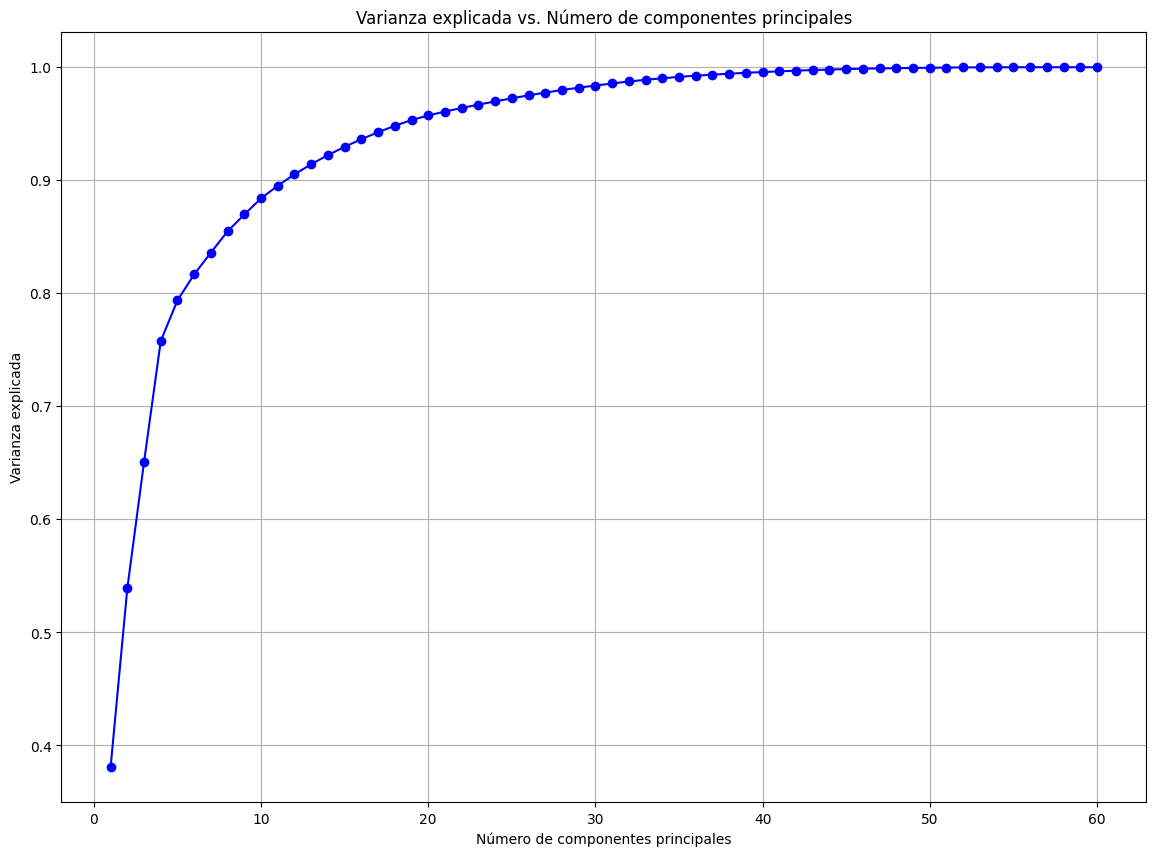

Varianza explicada:
[0.38073923 0.53895409 0.65064095 0.75783954 0.79376661 0.81674755
 0.83600538 0.85488866 0.86974481 0.883963   0.89517613 0.90524851
 0.91418531 0.92226987 0.92954028 0.93634591 0.94250962 0.94814474
 0.95328057 0.95731817 0.96080623 0.96391136 0.96690997 0.9697524
 0.97251837 0.97507972 0.97757045 0.97984254 0.9818887  0.9837943
 0.98560129 0.98737736 0.98885814 0.99021178 0.99146671 0.99249182
 0.99340289 0.99426309 0.99506508 0.99573263 0.99637148 0.99696393
 0.99750364 0.99793442 0.99834209 0.99869073 0.99893603 0.99915528
 0.99935483 0.99953649 0.99969782 0.99983164 0.99992172 0.99996343
 0.99997991 0.99998851 0.99999572 0.99999845 0.99999927 1.        ]


In [30]:
from sklearn.decomposition import PCA # para el PCA
import numpy as np

# Crear una instancia de PCA y ajustar los datos
pca = PCA(n_components=len(continuas_indices), whiten=True)
pca.fit(x_train[continuas_indices])

# Obtén la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Calcula la varianza explicada acumulativa
cumulative_variance_explained = np.cumsum(variance_explained)

# Crea una lista con el número de componentes principales
num_components = range(1, len(variance_explained) + 1)

print("Número de variables continuas: ", len(continuas_indices))

# Grafica la varianza explicada acumulativa
plt.figure(figsize=(14, 10))
plt.plot(num_components, cumulative_variance_explained, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada vs. Número de componentes principales')
plt.show()

print("Varianza explicada:")
print(cumulative_variance_explained)

En la siguiente gráfica podemos ver como va aumentando la varianza explicada dependiendo del número de variables con las que nos quedemos, cuando pasamos de doce a once variables podemos observar que empieza a disminuir drásticamente la varianza, podríamos elegir quedarnos con esas doce variables más reelevantes, el problema es que perdemos bastante varianza, lo ideal es poder suprimir variables pero sin sacrificar varianza, observando entonces la matriz de varianza explicada se puede observar que hasta 34 variables la varianza no baja del 99%, considero que con un 99% de la varianza apenas se pierde información y podemos reducir mucho la dimensión del problema, por lo que así procedo.

In [31]:
# Aplicar PCA como tal para quedarnos con 34 variables continuas
pca = PCA(n_components=34, whiten=True)
print('Características antes de aplicar PCA: ', len(x_train.columns))
pca.fit(x_train[continuas_indices])
x_transformada = pca.transform(x_train[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_train_pca = x_train.drop(continuas_indices, axis=1)
x_train_pca = pd.concat([x_train_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)

# Convertimos nombres de variables a string
x_train_pca.columns = x_train_pca.columns.astype(str)

print('Características tras aplicar PCA: ', len(x_train_pca.columns))
x_train_pca.head()

Características antes de aplicar PCA:  63
Características tras aplicar PCA:  37


,Posicion_2,Posicion_3,Posicion_4,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,True,False,False,0.378723,0.891728,-0.480128,-2.162573,-0.520203,0.256538,-1.305516,...,-0.752341,-0.051893,0.319591,1.899211,-0.184604,-0.134685,0.583324,1.137808,0.884477,-0.748490
1,False,True,True,0.978904,-1.844561,2.162294,0.791817,4.171301,-0.407920,1.098321,...,-0.522501,-0.394967,-2.143964,-0.025009,0.195657,-0.280996,-1.413904,-2.178745,1.184329,-0.446536
2,True,False,False,1.236528,1.168406,-0.026267,1.964455,1.178314,0.867113,0.932928,...,-0.922476,-0.161200,-0.656461,1.287407,-1.059949,1.363356,-2.326862,-0.636434,-1.120656,0.457947
3,True,False,False,1.922198,0.875799,-1.325080,-1.312148,-1.117301,-0.380301,-1.746620,...,-1.042064,-1.636025,1.432118,0.664497,-0.251007,0.540199,0.153025,0.234851,0.423715,-0.306266
4,True,False,False,-0.575080,-1.529614,-0.514854,0.447148,-0.357522,0.334018,0.355278,...,3.336181,1.448408,-0.893246,0.188692,-0.169855,0.139917,0.178179,0.090810,-0.000514,-0.275621


In [32]:
# Podemos ver cuanto aporta cada característica a las nuevas variables creadas por PCA
coeficientes = pca.components_
coeficientes[0]

array([ 0.05527865,  0.02543823,  0.23228315,  0.33467314,  0.03730086,
        0.07421258,  0.01673402,  0.01924874,  0.13643804,  0.02451463,
        0.04164973,  0.04038292,  0.07549492,  0.09596558,  0.17602821,
        0.06353533,  0.02503546,  0.13516737,  0.08356782,  0.01972901,
        0.07439187,  0.1419021 ,  0.14911824,  0.03546398,  0.01300906,
        0.22693327,  0.05805648,  0.05673049,  0.07227485,  0.04969406,
        0.02644465,  0.02139928,  0.22235646,  0.23353286,  0.19627876,
        0.18715618,  0.16060446,  0.16768168,  0.16732929,  0.18087925,
        0.16157476,  0.15701232,  0.10531614,  0.12568169,  0.09138074,
        0.05423075,  0.24287442,  0.06479681,  0.06572635,  0.21797825,
        0.18719541,  0.15552413,  0.09477369,  0.03581686,  0.09661745,
        0.04051122, -0.077539  , -0.11247751,  0.06379759,  0.09169387])

Los coeficientes indican la dirección y la fuerza de la relación entre las variables originales y los componentes principales. Un valor positivo en un coeficiente indica una relación positiva entre la variable original y el componente principal, mientras que un valor negativo indica una relación negativa. La magnitud del coeficiente indica la importancia de la variable original en la creación del componente principal.

In [33]:
# Aplicamos también ahora la misma transformación de PCA a test con los factores de train
x_transformada = pca.transform(x_test[continuas_indices])
x_transformada = pd.DataFrame(data=x_transformada)
x_test_pca = x_test.drop(continuas_indices, axis=1)
x_test_pca = pd.concat([x_test_pca.reset_index(drop=True), x_transformada.reset_index(drop=True)], axis=1)
x_test_pca.columns = x_test_pca.columns.astype(str)

Visualización de los datos (Reducción a 2D con sklearn.manifold.TSNE)

In [34]:
from sklearn.manifold import TSNE

# Creamos un objeto TSNE con el número de componentes deseadas (2D en este caso)
tsne = TSNE(n_components=2, random_state=42)

# Aplicamos t-SNE para reducir la dimensionalidad
X_tsne = tsne.fit_transform(x_train_pca)

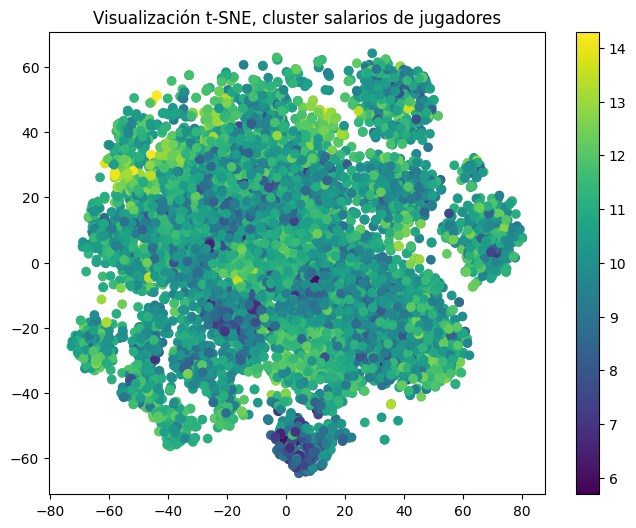

In [35]:
# Visualizamos los datos reducidos en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_log, cmap='viridis')
plt.title("Visualización t-SNE, cluster salarios de jugadores")
plt.colorbar()
plt.show()

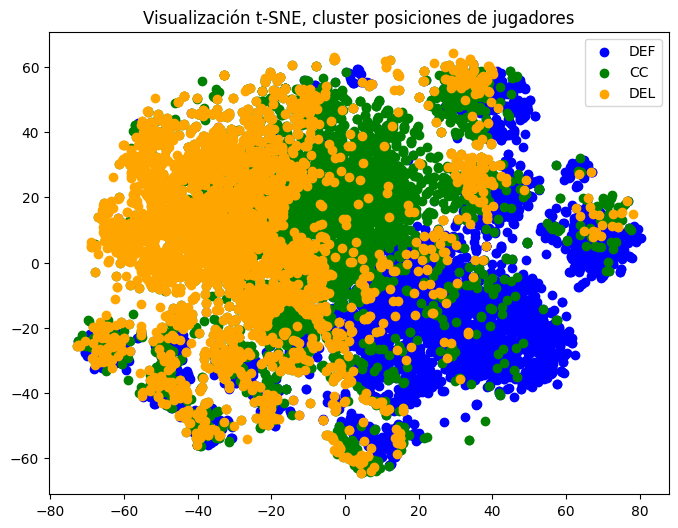

In [36]:
# Colores para cada condición
c2 = x_train_pca["Posicion_2"]
c3 = x_train_pca["Posicion_3"]
c4 = x_train_pca["Posicion_4"]

plt.figure(figsize=(8, 6))

# Scatter plot para 'Posicion_2'
plt.scatter(X_tsne[c2 == 1, 0], X_tsne[c2 == 1, 1], label="DEF", c='blue')

# Scatter plot para 'Posicion_3'
plt.scatter(X_tsne[c3 == 1, 0], X_tsne[c3 == 1, 1], label="CC", c='green')

# Scatter plot para 'Posicion_4'
plt.scatter(X_tsne[c4 == 1, 0], X_tsne[c4 == 1, 1], label="DEL", c='orange')

plt.title("Visualización t-SNE, cluster posiciones de jugadores")

# Agregar leyenda
plt.legend(loc="upper right")

plt.show()

Vemos como todos los datos son muy similares y forman prácticamente un cluster único.

# 4. Discusión de parámetros y selección del mejor modelo

Tras el anterior estudio, llego a la conclusión de que los mejores modelos son Gradient Boosting y Multi Layer Perceptron, por lo que serán los que pruebe aquí.

Inicializo Kfolds para hacer cross-validation.

In [37]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Definir el objeto KFold con 5 folds
folds = 5
kf = KFold(n_splits=folds)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def crossValidation(model, kFolds, dataset_x, dataset_y, train_stats=False):
  mae = 0
  mse = 0
  r2 = 0
  mae_tr = 0
  mse_tr = 0
  r2_tr = 0

  # Transformar los dataset a numpy
  x = dataset_x.to_numpy()
  y = dataset_y.to_numpy()

  for train_index, val_index in kFolds.split(x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    train_x_fold, val_x_fold = x[train_index], x[val_index]
    train_y_fold, val_y_fold = y[train_index], y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(train_x_fold, train_y_fold)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(val_x_fold)

    # Calcular el MSE medio
    mse += mean_squared_error(val_y_fold, pred_y)

    # Calcular el MAE medio
    mae += mean_absolute_error(val_y_fold, pred_y)

    # Calcular el Coeficiente de determinación
    r2 += r2_score(val_y_fold, pred_y)

    # Calcular errores para train
    if train_stats:
      pred_y = model.predict(train_x_fold)

      mse_tr += mean_squared_error(train_y_fold, pred_y)
      mae_tr += mean_absolute_error(train_y_fold, pred_y)
      r2_tr += r2_score(train_y_fold, pred_y)

  if train_stats:
    return model, mse/folds, mae/folds, r2/folds, mse_tr/folds, mae_tr/folds, r2_tr/folds
  else:
    return model, mse/folds, mae/folds, r2/folds

Como disponemos de bastantes datos indico que haya 5 folds, para tener un equilibrio entre seguridad, por haber validado con varios conjuntos, y tiempo de entrenamiento.

In [38]:
def graficaComparacion(valores, titulos, categorias):
  sns.set(rc = {'figure.figsize':(10,8)})

  # Configurar los valores de las barras y su posición en el eje x
  num_variables = len(valores)
  x = np.arange(len(categorias))
  ancho_barras = 0.5 / num_variables

  # Crear la figura y los ejes
  fig, ax = plt.subplots()

  # Ir añadiendo las barras de los distintos modelos
  for i in range(num_variables):
    desplazamiento = i * ancho_barras
    barras = ax.bar(x + desplazamiento, valores[i,:], ancho_barras, label=titulos[i])
    for barra in barras:
        altura = round(barra.get_height(), 3)
        if num_variables < 4:
          ax.annotate(altura, xy=(barra.get_x() + barra.get_width() / 2, altura),
                      xytext=(0, 3),  # Desplazamiento de la etiqueta (opcional)
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=8)

  # Etiquetas de las categorías en el eje x
  ax.set_xticks(np.arange(len(categorias)) + (num_variables - 1) * ancho_barras / 2)
  ax.set_xticklabels(categorias)

  # Leyenda y título del gráfico
  ax.legend()
  plt.title('Gráfica comparativa de métricas')

  # Mostrar el gráfico
  plt.show()

In [39]:
from tabulate import tabulate

def tablaComparacion(valores, categorias, titulos):
  # Imprimir la tabla
  metricas = []
  titulos2 = titulos.copy()
  titulos2.insert(0, 'Métricas de error')
  for i in range(len(valores[0])):
    fila = []
    fila.append(categorias[i])
    for j in range(len(valores)):
      fila.append(valores[j][i])
    metricas.append(fila)

  print(tabulate(metricas, headers=titulos2, tablefmt="fancy_grid"))

### Gradient Boosting

**n_estimators**

Por lo general a mayor número mejores resultados, aunque hay que encontrar el equilibrio entre mejora y tiempo de cómputo invertido.

╒═════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤══════════════════════╕
│ Métricas de error   │   n_estimators = 20 │   n_estimators = 50 │   n_estimators = 100 │   n_estimators = 200 │
╞═════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╪══════════════════════╡
│ MSE                 │            0.666021 │            0.543382 │             0.507963 │             0.494615 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ MAE                 │            0.620633 │            0.558756 │             0.540892 │             0.533915 │
├─────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ R^2                 │            0.549226 │            0.632224 │             0.656203 │             0.66524  │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────

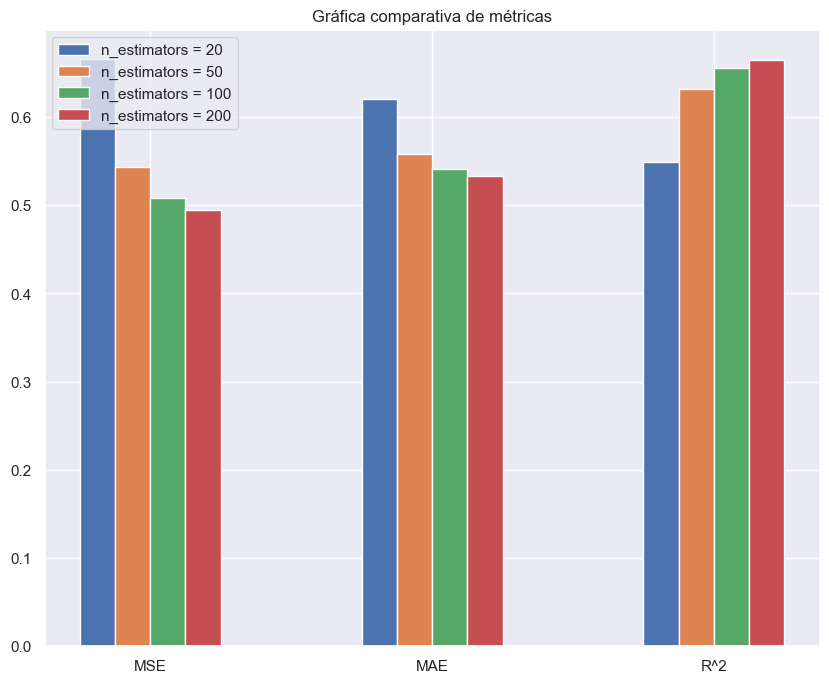

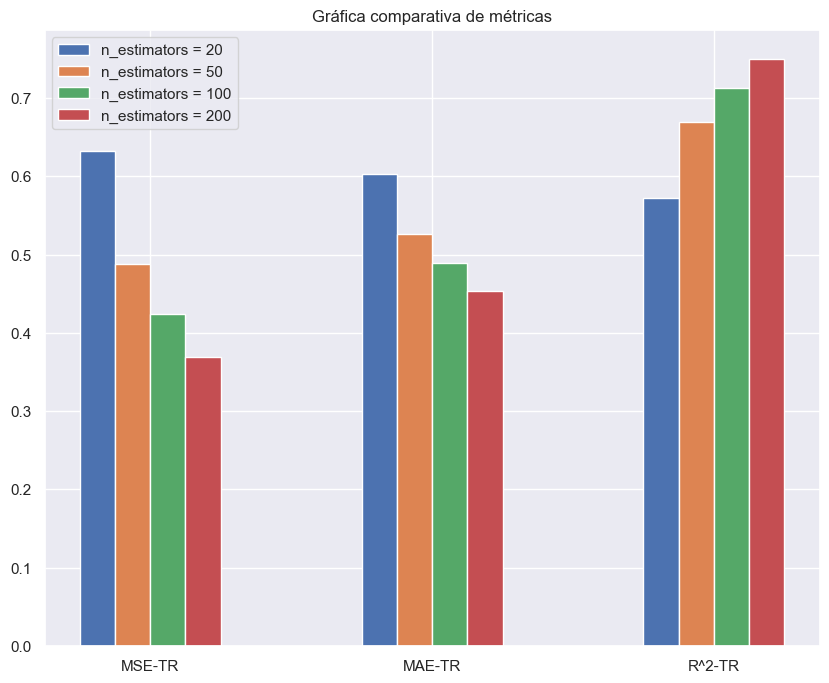

In [40]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 20, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 50, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 200, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['n_estimators = 20', 'n_estimators = 50', 'n_estimators = 100', 'n_estimators = 200']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De momento 100 árboles está bien, el tiempo de cómputo es competente y los resultados buenos, no aumentamos más debido a que ya no hay tanta mejora en validación, si conseguimos mejorar la generalización del modelo más adelante puede que aumente el número de árboles.

**learning_rate**

Un valor más bajo de tasa de aprendizaje reduce el impacto de cada árbol, lo que puede ayudar a prevenir el sobreajuste y a mejorar la generalización.

Probamos un conjunto de valores alrededor de 0.1 que es el valor predeterminado.

╒═════════════════════╤════════════════════════╤════════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╕
│ Métricas de error   │   learning_rate = 0.04 │   learning_rate = 0.08 │   learning_rate = 0.1 │   learning_rate = 0.4 │   learning_rate = 0.8 │
╞═════════════════════╪════════════════════════╪════════════════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╡
│ MSE                 │               0.564575 │               0.516213 │              0.507963 │              0.525093 │              0.619693 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ MAE                 │               0.569499 │               0.545061 │              0.540892 │              0.553248 │              0.606528 │
├─────────────────────┼────────────────────────┼────────────────────────┼───────────────────────┼───────────────────────┼───

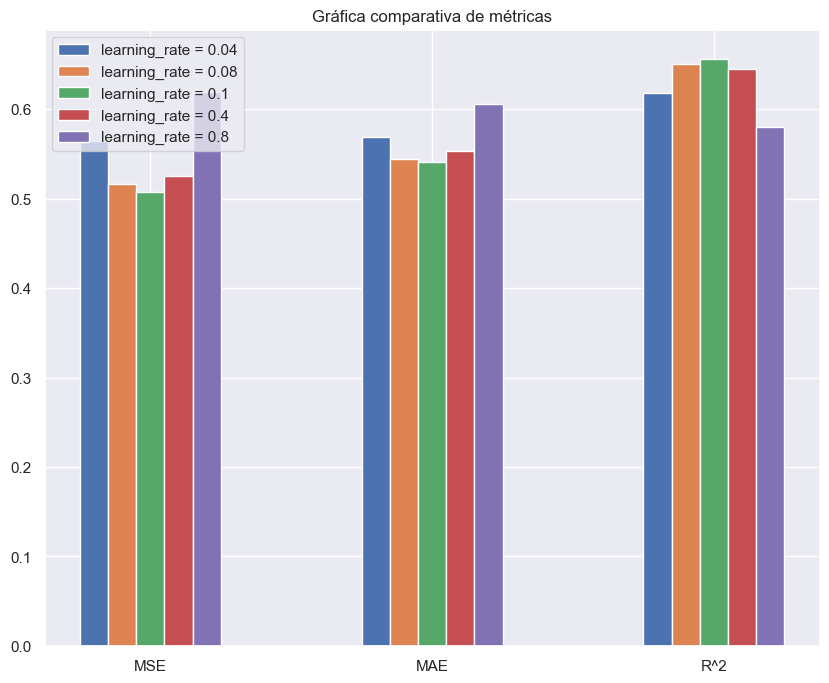

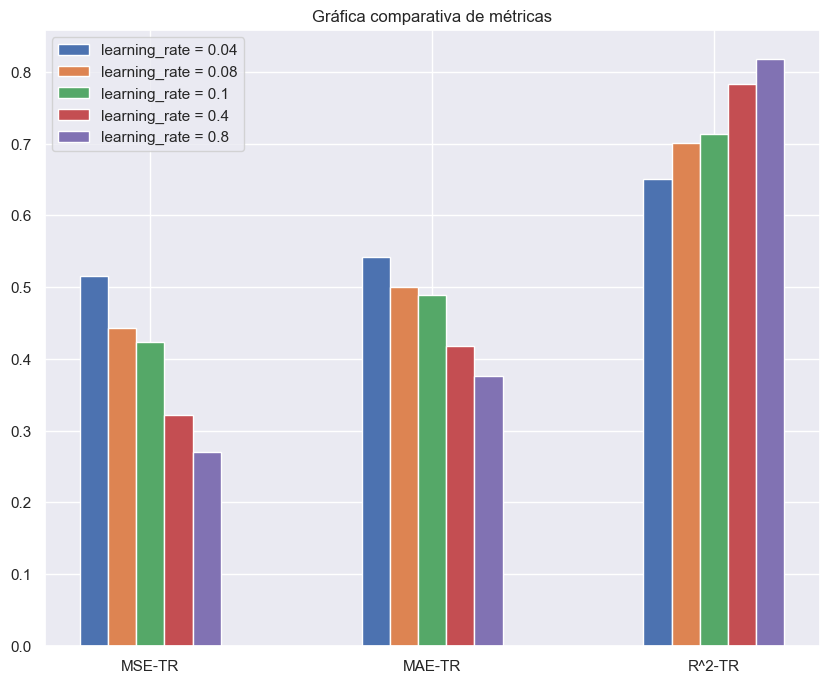

In [41]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.04, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.08, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.4, random_state=34)
model_5 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.8, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(model_5, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:], result5[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['learning_rate = 0.04', 'learning_rate = 0.08', 'learning_rate = 0.1', 'learning_rate = 0.4', 'learning_rate = 0.8']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Un learning_rate de 0.1 es el que mejores resultados ofrece, por lo que mantengo dicho valor.

**subsample**

Un valor menor de subsample significa una reducción de la varianza y aumento del sesgo en el proceso de entrenamiento, ya que cada árbol se entrena en un subconjunto aleatorio de las muestras. Esto puede ayudar a reducir el riesgo de sobreajuste.

Probaré con distintos porcentajes de subsample.

╒═════════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│ Métricas de error   │   subsample=1.0 │   subsample=0.8 │   subsample=0.6 │   subsample=0.4 │
╞═════════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ MSE                 │        0.507963 │        0.504474 │        0.499636 │        0.501565 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MAE                 │        0.540892 │        0.539574 │        0.538141 │        0.540609 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ R^2                 │        0.656203 │        0.658554 │        0.661829 │        0.660518 │
├─────────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│ MSE-TR              │        0.423518 │        0.422907 │        0.422435 │        0.425746 │
├─────────────────────┼─────────────────

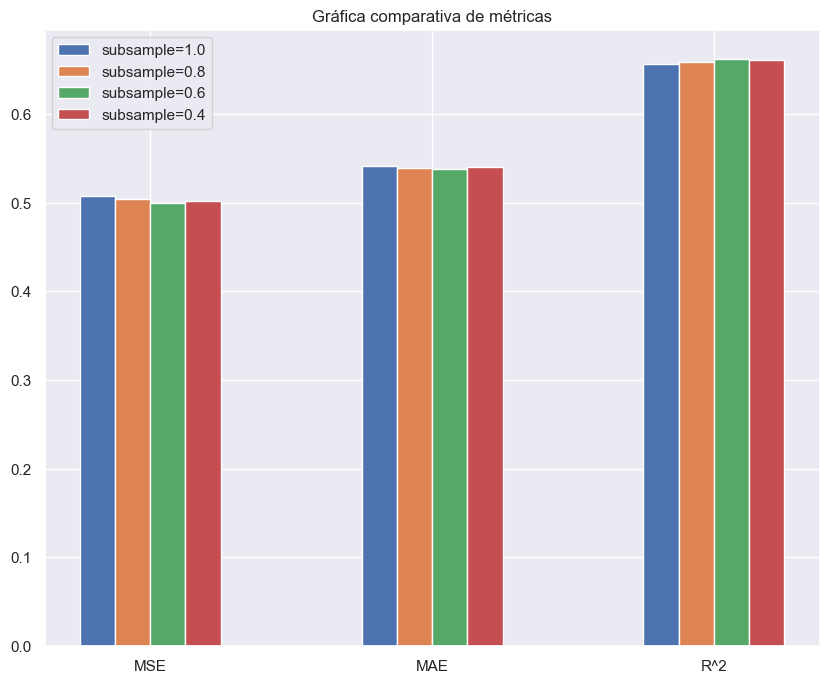

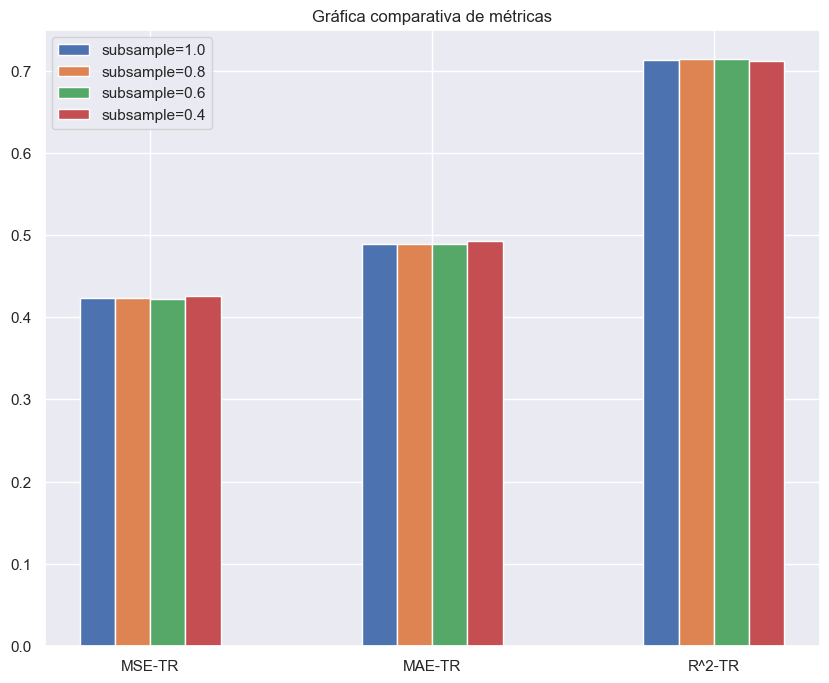

In [42]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=1.0, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.8, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.4, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['subsample=1.0', 'subsample=0.8', 'subsample=0.6', 'subsample=0.4']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Nos quedamos con subsamples del 60%.

**max_depth**

A mayor profundidad creamos árboles más complejos, pero puede existir sobreajuste si no se controla. Probaré varios valores teniendo en cuenta que hasta ahora el valor por defecto ha sido 3.

╒═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Métricas de error   │   max_depth=2 │   max_depth=3 │   max_depth=4 │   max_depth=6 │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ MSE                 │      0.531541 │      0.499636 │      0.492349 │      0.487138 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE                 │      0.553811 │      0.538141 │      0.533473 │      0.530884 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ R^2                 │      0.640227 │      0.661829 │      0.666791 │      0.670273 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MSE-TR              │      0.491099 │      0.422435 │      0.354676 │      0.196268 │
├─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ MAE-TR              │      0.5

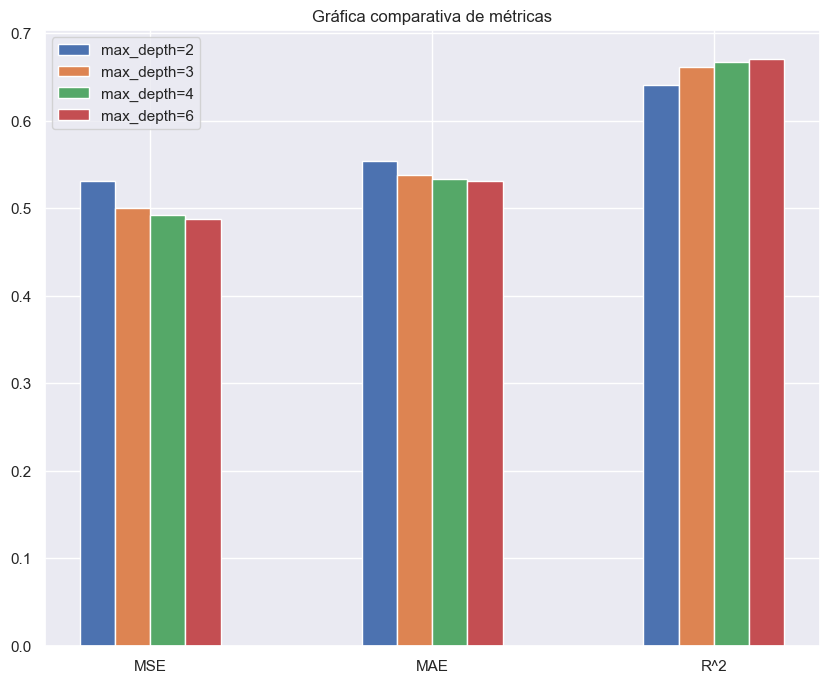

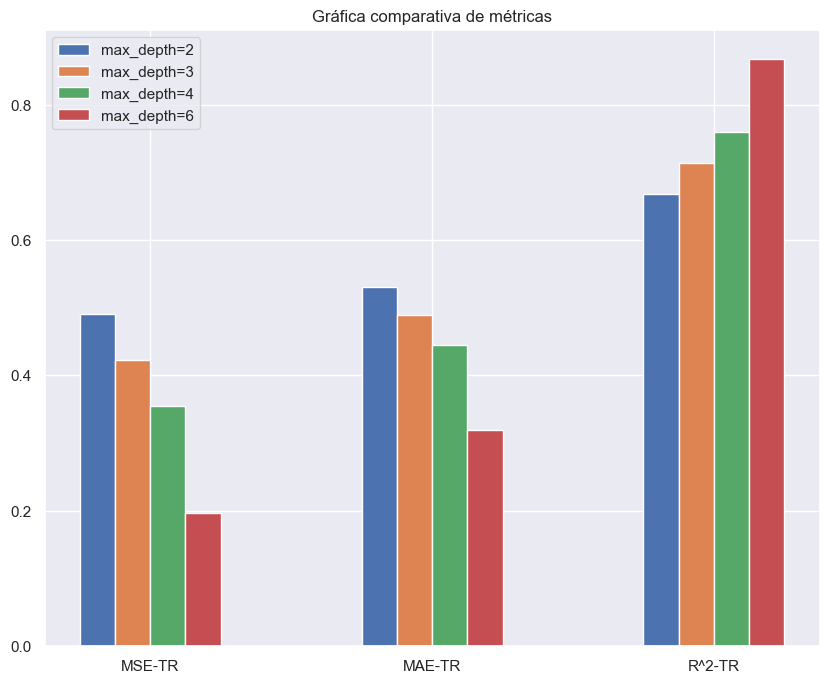

In [43]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=2, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=3, random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=4, random_state=34)
model_4 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=6, random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:], result4[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=6']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

Una profundidad de 4 es la que mejores resultados da, entiendo que no podemos reducir más el sobreajuste mediante tuneo de parámetros, si reducimos la complejidad el modelo no generalizará mejor, sino que simplemente no podrá adaptarse a la complejidad de la relación de los datos del problema.

**max_features**

Al reducir el máximo de características hacemos que se reduzca la variabilidad y aumente el sesgo, aunque con otros parámetros que ya hemos modificado esto no ha ayudado probaré varios valores para ver si sirve de algo.

╒═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Métricas de error   │   max_features=None │   max_features=sqrt │   max_features=log2 │
╞═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ MSE                 │            0.492349 │            0.502819 │            0.508695 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE                 │            0.533473 │            0.5412   │            0.542679 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ R^2                 │            0.666791 │            0.65967  │            0.655698 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MSE-TR              │            0.354676 │            0.388199 │            0.394937 │
├─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ MAE-TR  

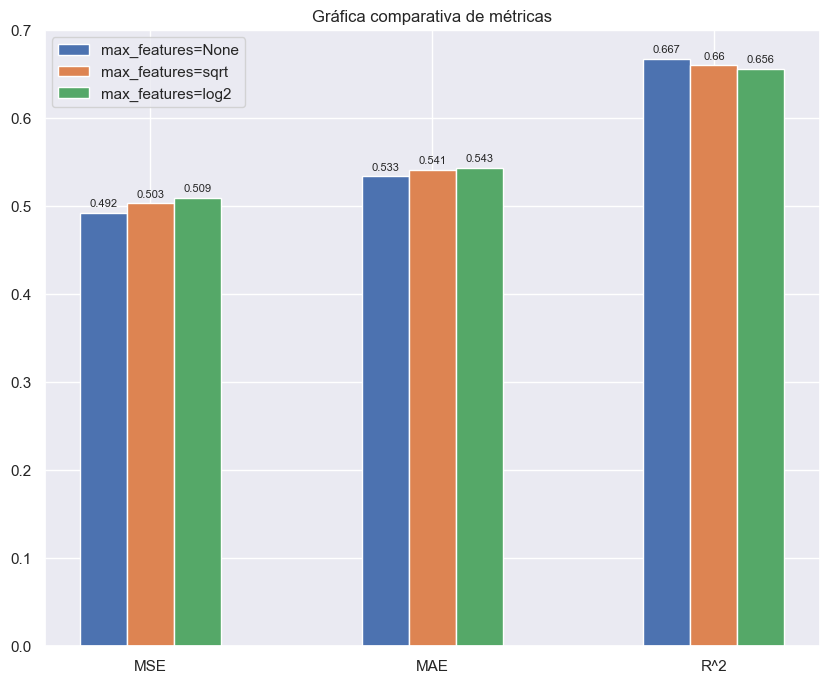

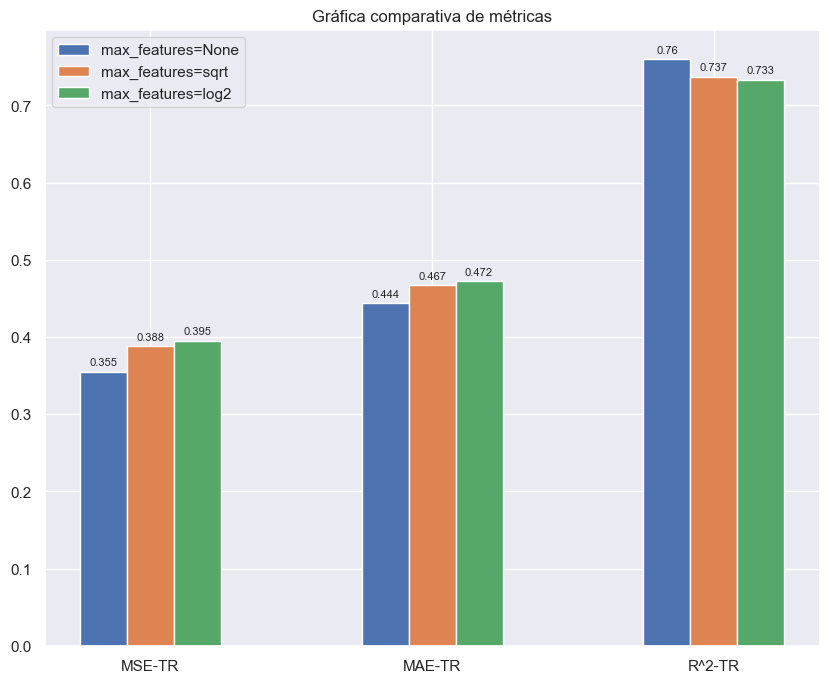

In [44]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=4, max_features=None, random_state=34)
model_2 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=4, max_features='sqrt', random_state=34)
model_3 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=4, max_features='log2', random_state=34)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:], result3[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['max_features=None', 'max_features=sqrt', 'max_features=log2']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])

De nuevo el intentar reducir la complejidad no sirve de nada, apesar de que reduciendo características se generaliza mejor, esto no es por una mejora en los resultados de validación, sino por una peora en los de train, dejo pues el parámetro que había por defecto.

Concluyendo eliminando los porteros no obtenemos ninguna mejora con GB. Siendo los resultados finales algo peores que utilizando todo el dataset.

### Multi Layer Perceptron

**hidden_layer_sizes**

Agregar más neuronas o capas ocultas puede permitir que la red aprenda representaciones más complejas de los datos, pero también puede aumentar el riesgo de sobreajuste.

Buscaré información en internet acerca de cual es el número adecuado de capas a añadir.

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

Normalmente con una capa oculta suele bastar y en cuanto al número de nodos este suele ser la media entre la capa de entrada y la de salida, en este caso 28. Probaré esta estructura junto con otras estructuras modificadas de esta y compararé los resultados.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


╒═════════════════════╤═══════════════════════════╤═══════════════════════════════╤═══════════════════════════╤═══════════════════════════════╕
│ Métricas de error   │   hidden_layer_sizes=(28) │   hidden_layer_sizes=(28, 28) │   hidden_layer_sizes=(56) │   hidden_layer_sizes=(56, 56) │
╞═════════════════════╪═══════════════════════════╪═══════════════════════════════╪═══════════════════════════╪═══════════════════════════════╡
│ MSE                 │                  0.547909 │                      0.582565 │                  0.62366  │                      0.785463 │
├─────────────────────┼───────────────────────────┼───────────────────────────────┼───────────────────────────┼───────────────────────────────┤
│ MAE                 │                  0.573565 │                      0.584425 │                  0.61284  │                      0.679955 │
├─────────────────────┼───────────────────────────┼───────────────────────────────┼───────────────────────────┼─────────────────────────

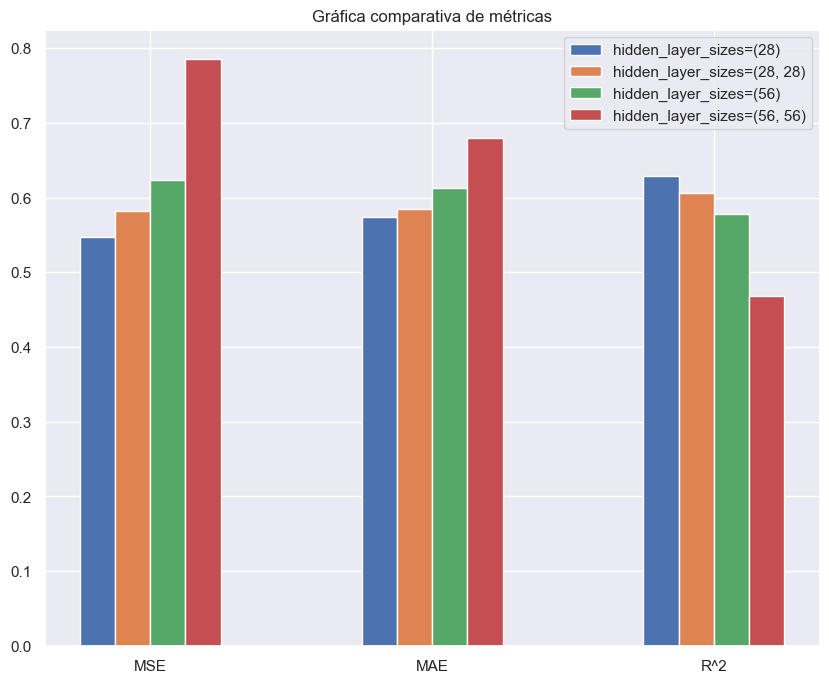

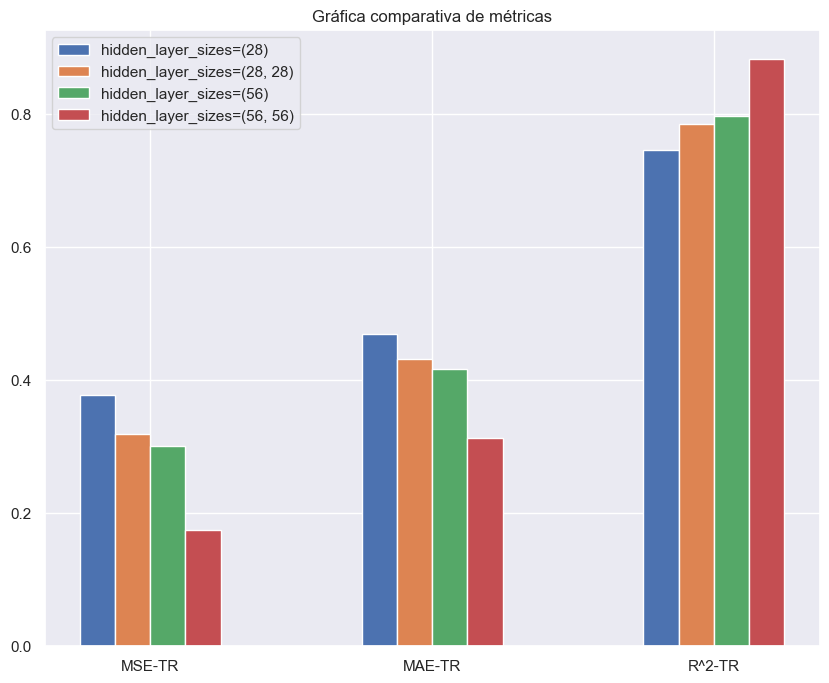

In [45]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=500)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28, 28), max_iter=500)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(56), max_iter=500)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(56, 56), max_iter=500)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['hidden_layer_sizes=(28)', 'hidden_layer_sizes=(28, 28)', 'hidden_layer_sizes=(56)', 'hidden_layer_sizes=(56, 56)']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que a más capas más sobreajuste como ya comentabamos y también a más nodos por capa más sobreajuste. También podemos ver que en general es mejor aumentar el número de capas que el número de nodos por capa.

**activation**

Porbaremos dos funciones de activación:

* 'relu' (Rectified Linear Unit): Esta es una de las funciones de activación más populares. Es una función no lineal que devuelve el valor de entrada si es positivo y 0 si es negativo. Es la que viene por defecto.

* 'tanh': Utiliza la función tangente hiperbólica como función de activación. La función tangente hiperbólica comprime la salida de las neuronas en el rango (-1, 1) y se utiliza comúnmente en problemas de regresión y clasificación.

╒═════════════════════╤═══════════════════╤═══════════════════╕
│ Métricas de error   │   activation=relu │   activation=tanh │
╞═════════════════════╪═══════════════════╪═══════════════════╡
│ MSE                 │          0.547909 │          0.506501 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MAE                 │          0.573565 │          0.548536 │
├─────────────────────┼───────────────────┼───────────────────┤
│ R^2                 │          0.629193 │          0.657228 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MSE-TR              │          0.37686  │          0.368584 │
├─────────────────────┼───────────────────┼───────────────────┤
│ MAE-TR              │          0.469273 │          0.461832 │
├─────────────────────┼───────────────────┼───────────────────┤
│ R^2-TR              │          0.745035 │          0.750637 │
╘═════════════════════╧═══════════════════╧═══════════════════╛


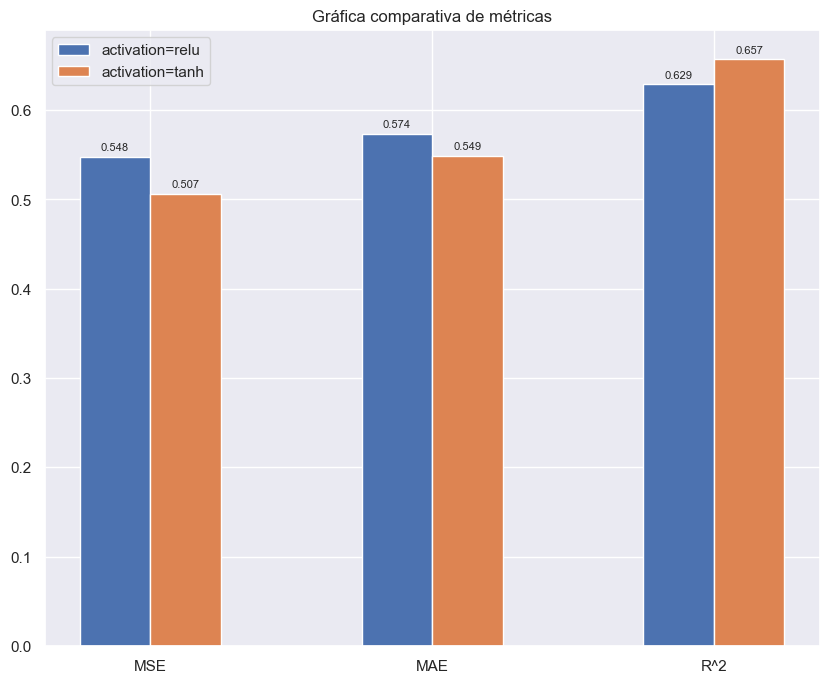

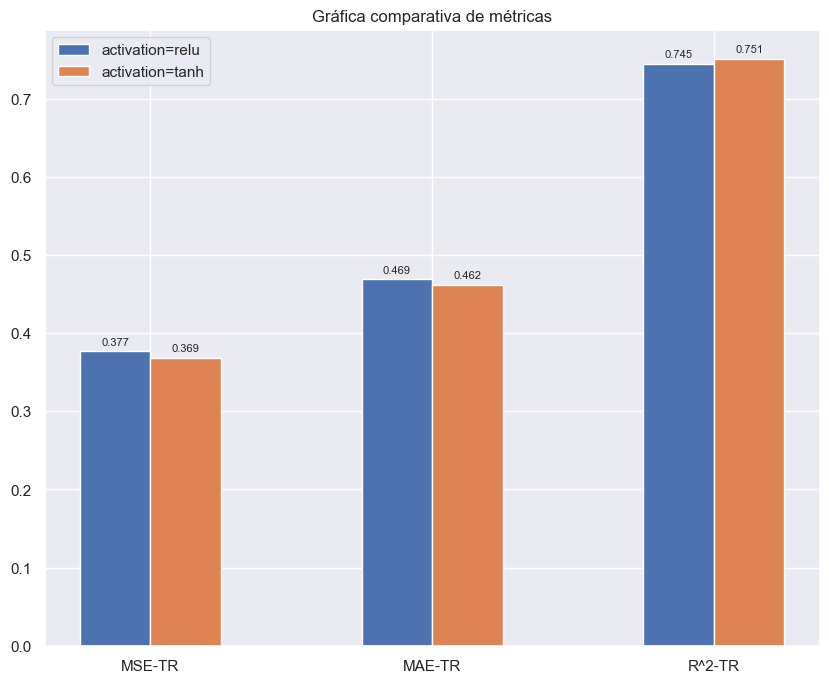

In [46]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=500, activation='relu')
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh')

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['activation=relu', 'activation=tanh']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Con la tangente hiperbólica vemos que el sobreajuste se reduce bastante en comparación con 'relu', tal vez porque esta última sea demasiado compleja para nuestro problema, selecciono entonces la tangente hiperbólica.

**solver**

Compararemos el solver 'adam' con el 'lbfgs', adam es el más comúnmente utilizado, usa el método de SGD, aunque automáticamente optimiza el valor del learning rate, por lo que es menos sensible que 'sgd' a la elección manual del mismo. En cuanto a lbfgs este es un algoritmo de optimización de segundo orden que utiliza el método de Broyden-Fletcher-Goldfarb-Shanno (BFGS). Puede ser más lento en comparación con 'adam' y 'sgd', pero puede ser útil para conjuntos de datos más pequeños.

C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\34667\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res,

╒═════════════════════╤═══════════════╤════════════════╕
│ Métricas de error   │   solver=adam │   solver=lbfgs │
╞═════════════════════╪═══════════════╪════════════════╡
│ MSE                 │      0.506501 │       0.708865 │
├─────────────────────┼───────────────┼────────────────┤
│ MAE                 │      0.548536 │       0.640638 │
├─────────────────────┼───────────────┼────────────────┤
│ R^2                 │      0.657228 │       0.520127 │
├─────────────────────┼───────────────┼────────────────┤
│ MSE-TR              │      0.368584 │       0.261312 │
├─────────────────────┼───────────────┼────────────────┤
│ MAE-TR              │      0.461832 │       0.390471 │
├─────────────────────┼───────────────┼────────────────┤
│ R^2-TR              │      0.750637 │       0.823211 │
╘═════════════════════╧═══════════════╧════════════════╛


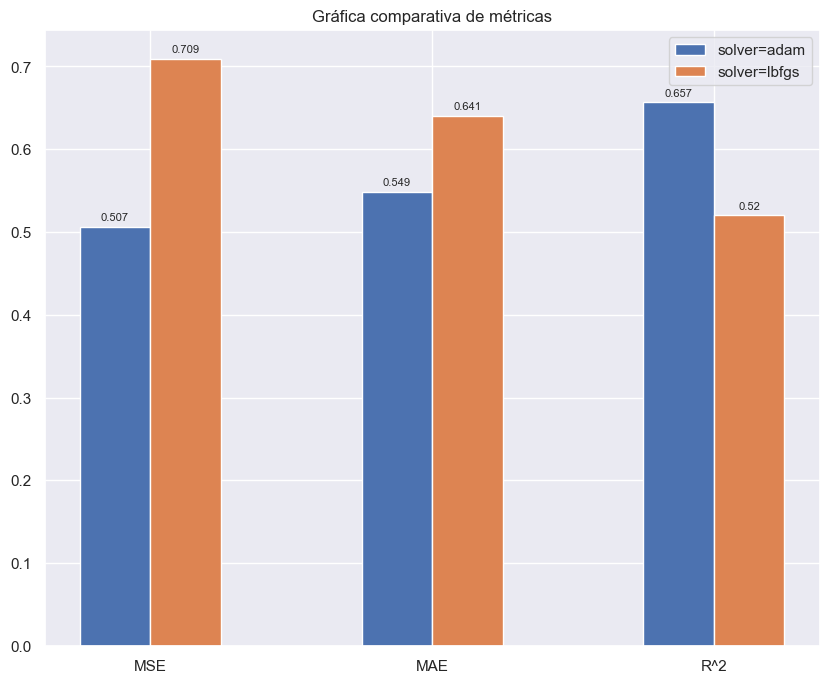

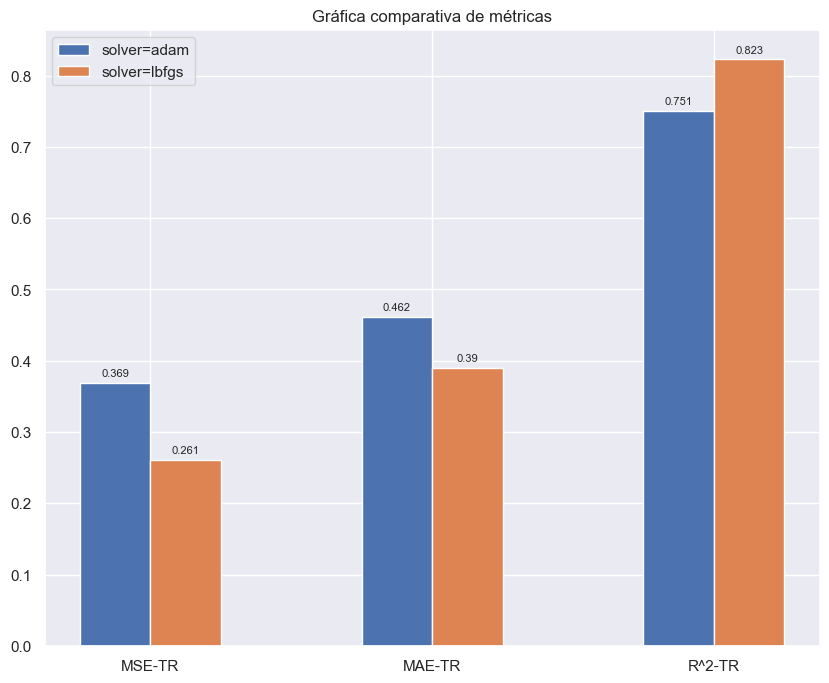

In [47]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam')
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='lbfgs')

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['solver=adam', 'solver=lbfgs']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que con el solver lbfgs el sobreajuste es enorme, por lo que nos quedamos con adam.

**alpha**

Debido a los problemas de sobreajuste, la idea es aplicar una fuerte regularización al modelo, por lo que los valores a probar serán el valor por defecto (0.0001) y valores de magnitudes mayores.

╒═════════════════════╤════════════════╤═══════════════╤══════════════╤═════════════╤═══════════╕
│ Métricas de error   │   alpha=0.0001 │   alpha=0.001 │   alpha=0.01 │   alpha=0.1 │   alpha=1 │
╞═════════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╪═══════════╡
│ MSE                 │       0.506501 │      0.506345 │     0.502896 │    0.493199 │  0.455361 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ MAE                 │       0.548536 │      0.548417 │     0.545745 │    0.539468 │  0.514219 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ R^2                 │       0.657228 │      0.657333 │     0.659677 │    0.666202 │  0.691826 │
├─────────────────────┼────────────────┼───────────────┼──────────────┼─────────────┼───────────┤
│ MSE-TR              │       0.368584 │      0.368643 │     0.369681 │    0.376263 │  0.409127 │
├───────────────────

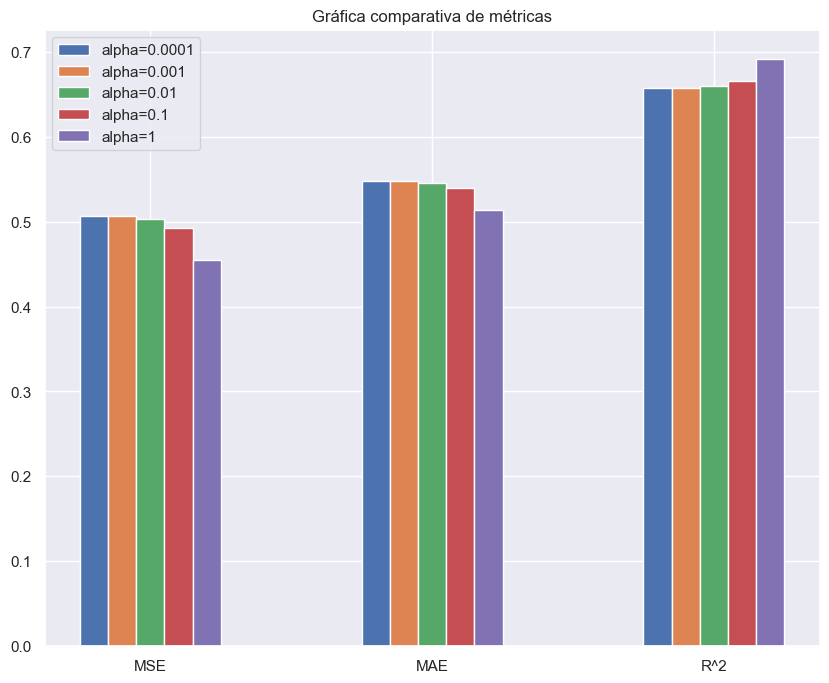

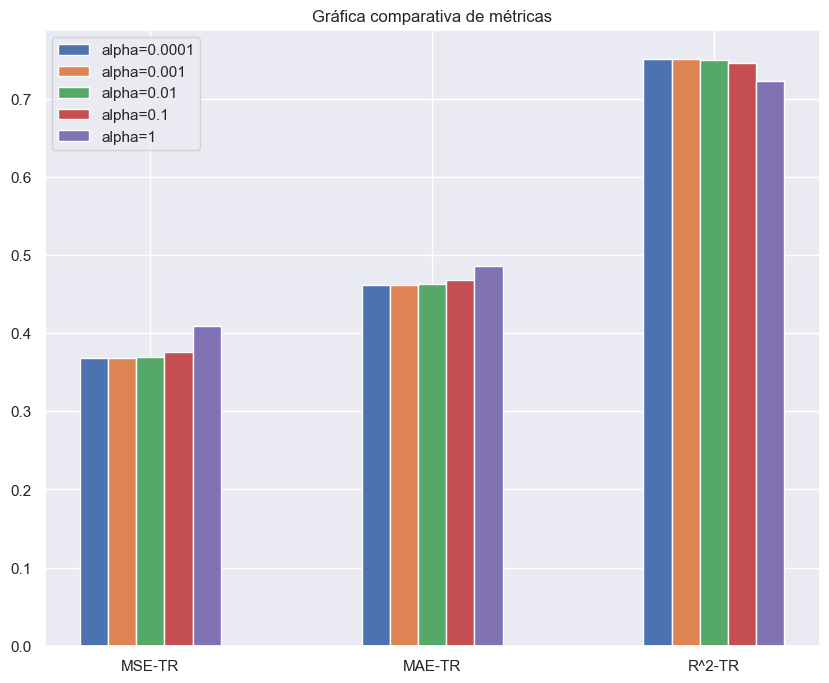

In [48]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.0001)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.001)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.01)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=0.1)
model_5 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)
result5 = crossValidation(model_5, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4, result5))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['alpha=0.0001', 'alpha=0.001', 'alpha=0.01', 'alpha=0.1', 'alpha=1']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que regularizar fuertemente funciona, de hecho voy a probar a seguir aumentando alpha para ver como se comporta el modelo.

╒═════════════════════╤═══════════╤═════════════╤═══════════╕
│ Métricas de error   │   alpha=1 │   alpha=2.5 │   alpha=5 │
╞═════════════════════╪═══════════╪═════════════╪═══════════╡
│ MSE                 │  0.455361 │    0.459704 │  0.47423  │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ MAE                 │  0.514219 │    0.5163   │  0.527431 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ R^2                 │  0.691826 │    0.688884 │  0.679063 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ MSE-TR              │  0.409127 │    0.438439 │  0.464816 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ MAE-TR              │  0.485524 │    0.504457 │  0.522247 │
├─────────────────────┼───────────┼─────────────┼───────────┤
│ R^2-TR              │  0.723204 │    0.703371 │  0.685527 │
╘═════════════════════╧═══════════╧═════════════╧═══════════╛


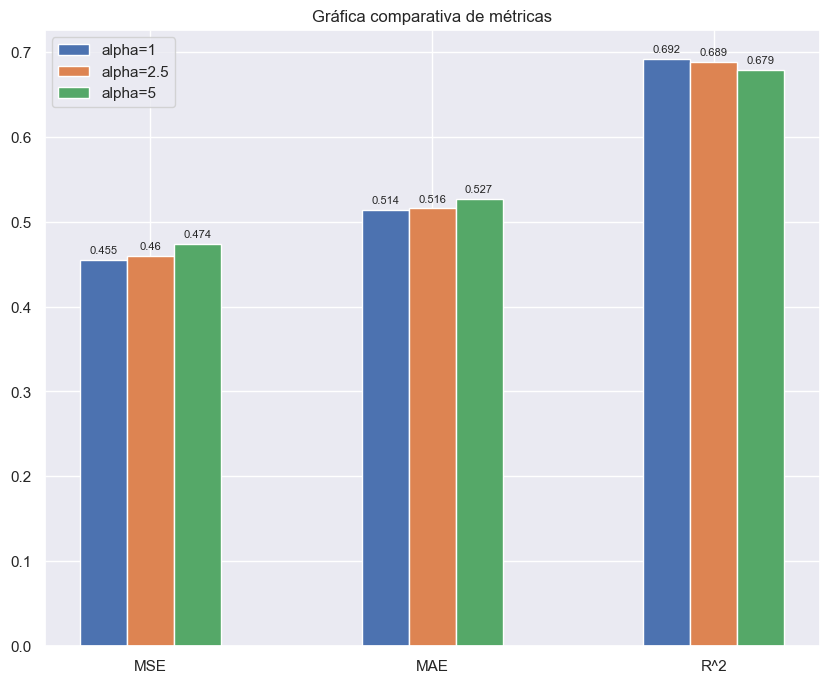

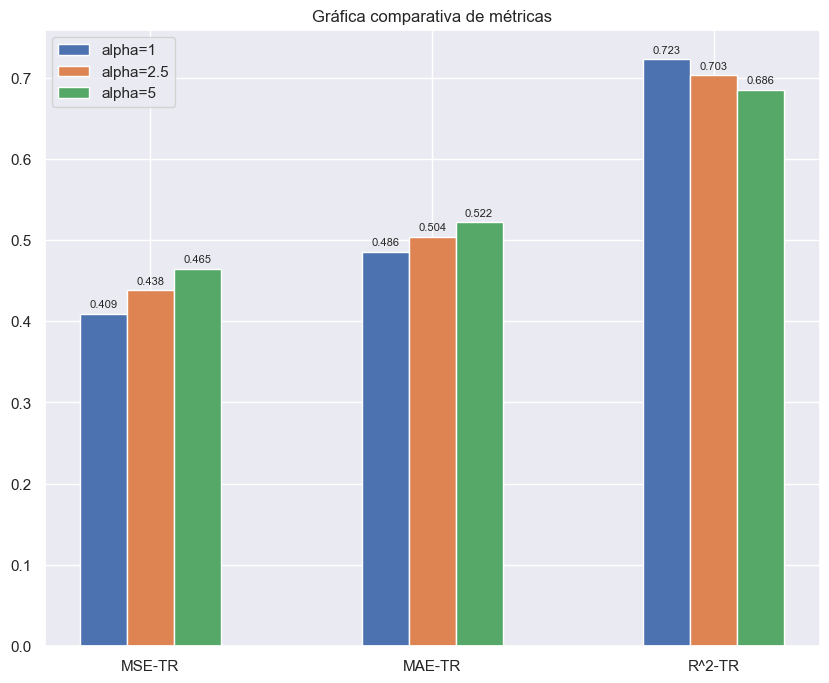

In [49]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=2.5)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=5)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['alpha=1', 'alpha=2.5', 'alpha=5']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que con alpha=1 es suficiente, cuando seguimos aumentando la regularización ya empeoramos demasiado el modelo en train, por lo que al final en validación los resultados también van a ser peores aunque generalice mejor.

**learning_rate_init**

Siendo el valor por defecto 0.001, probaré valores de magnitudes superiores a dicho valor, si no pruebo magnitudes inferiores es porque viendo los warning de que 1000 iteraciones no son suficientes para converger, un learning rate menor implicará más iteraciones aún y por tanto probablemente solo empeore los resultados.

╒═════════════════════╤════════════╤═══════════╤══════════╤══════════╕
│ Métricas de error   │   lr=0.001 │   lr=0.01 │   lr=0.1 │     lr=1 │
╞═════════════════════╪════════════╪═══════════╪══════════╪══════════╡
│ MSE                 │   0.455361 │  0.474048 │ 0.563204 │ 1.13846  │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ MAE                 │   0.514219 │  0.525643 │ 0.579241 │ 0.850884 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ R^2                 │   0.691826 │  0.679171 │ 0.619062 │ 0.229184 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ MSE-TR              │   0.409127 │  0.434909 │ 0.550498 │ 1.13813  │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ MAE-TR              │   0.485524 │  0.502377 │ 0.575017 │ 0.853959 │
├─────────────────────┼────────────┼───────────┼──────────┼──────────┤
│ R^2-TR              │   0.723204 │  0.705752 │ 0.627505 │ 0.230076 │
╘═════

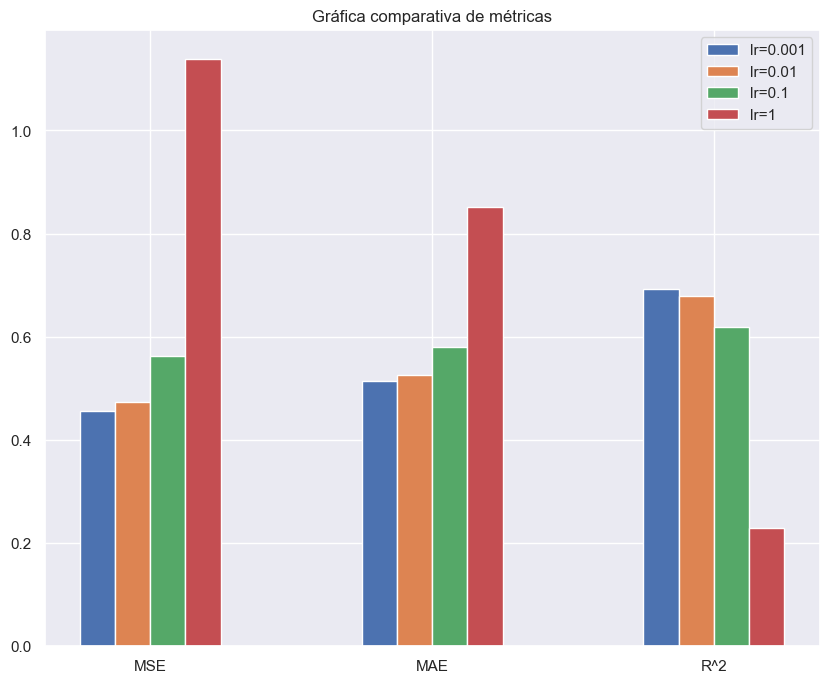

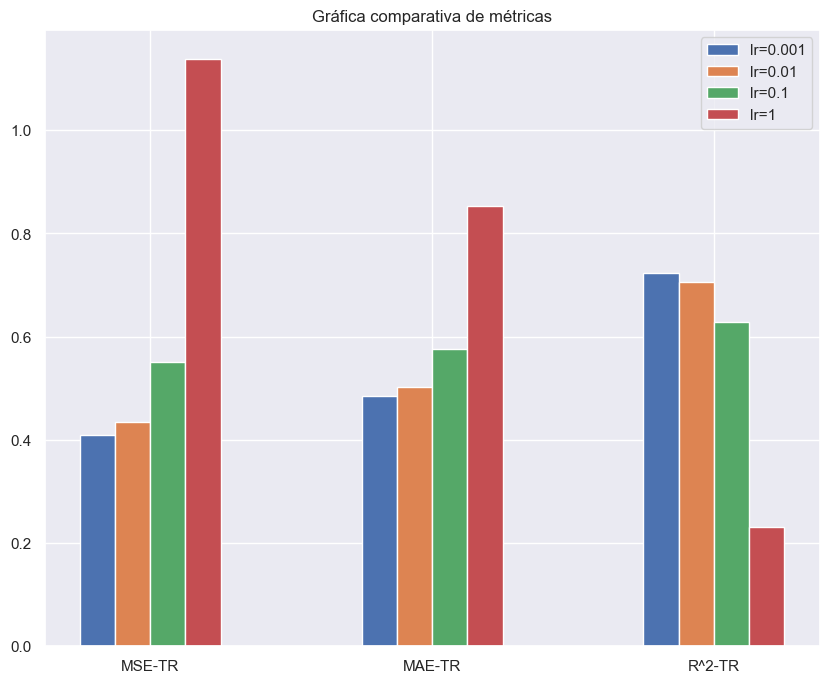

In [50]:
# Definir los modelos con los distintos hiperparámetros que se desean probar
model_1 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.001)
model_2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.01)
model_3 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.1)
model_4 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=1)

# Aplicamos CV a nuestros modelos para obtener sus métricas de error
result1 = crossValidation(model_1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model_2, kf, x_train_pca, y_train_log, True)
result3 = crossValidation(model_3, kf, x_train_pca, y_train_log, True)
result4 = crossValidation(model_4, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1, result2, result3, result4))

categorias = ['MSE', 'MAE', 'R^2', 'MSE-TR', 'MAE-TR', 'R^2-TR']
titulos = ['lr=0.001', 'lr=0.01', 'lr=0.1', 'lr=1']

tablaComparacion(all_result[:, 1:7], categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 1:4], titulos, categorias[0:3])
graficaComparacion(all_result[:, 4:7], titulos, categorias[3:6])

Vemos que un lr=0.001 da los mejores resultados, por lo que dejamos ese.

En este caso si conseguimos una ligera mejora con respecto al modelo entrenado con porteros, aunque solo de un punto en $R^2$, por lo que en definitiva este no es un inconveniente mayor a la hora de predecir los salarios.

# 5. Validación cruzada para elección del mejor modelo

╒═════════════════════╤════════════════════╤══════════╕
│ Métricas de error   │   GradientBoosting │      MLP │
╞═════════════════════╪════════════════════╪══════════╡
│ MSE                 │           0.492349 │ 0.455361 │
├─────────────────────┼────────────────────┼──────────┤
│ MAE                 │           0.533473 │ 0.514219 │
├─────────────────────┼────────────────────┼──────────┤
│ R^2                 │           0.666791 │ 0.691826 │
├─────────────────────┼────────────────────┼──────────┤
│ MSE_tr              │           0.354676 │ 0.409127 │
├─────────────────────┼────────────────────┼──────────┤
│ MAE_tr              │           0.4443   │ 0.485524 │
├─────────────────────┼────────────────────┼──────────┤
│ R^2_tr              │           0.760036 │ 0.723204 │
╘═════════════════════╧════════════════════╧══════════╛


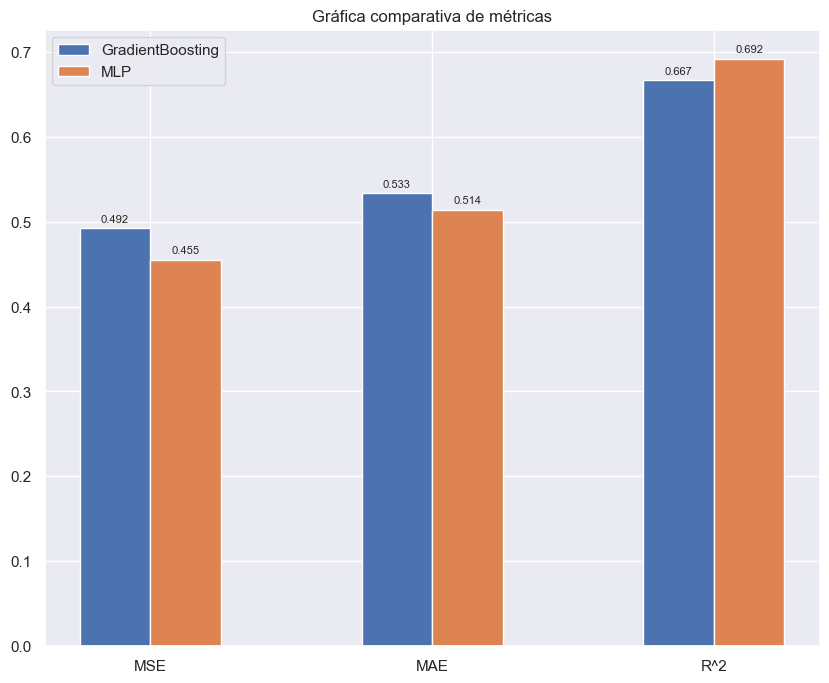

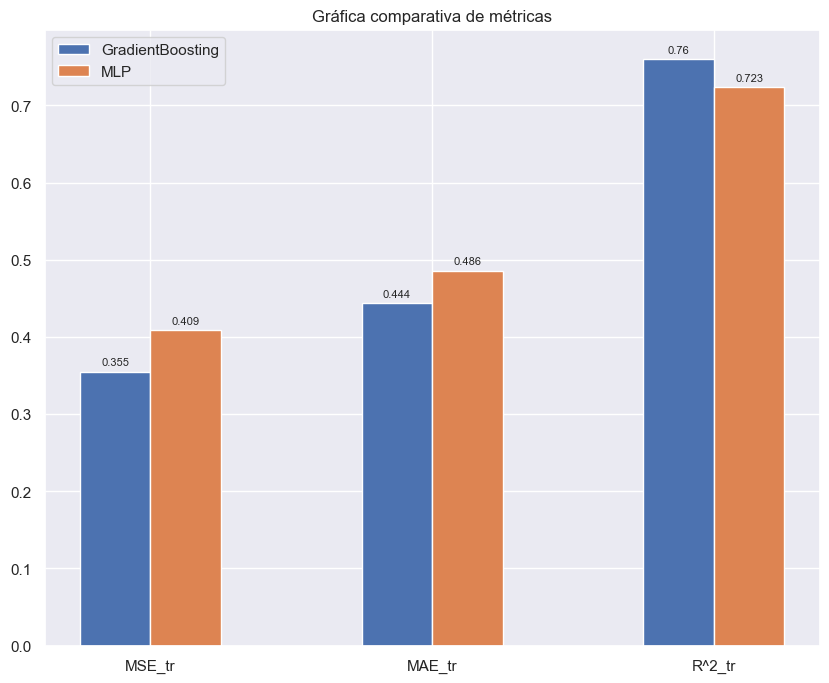

In [51]:
model1 = GradientBoostingRegressor(loss='huber', n_estimators = 100, learning_rate=0.1, subsample=0.6, max_depth=4, max_features=None, random_state=34)
model2 = MLPRegressor(random_state=34, hidden_layer_sizes=(28), max_iter=750, activation='tanh', solver='adam', alpha=1, learning_rate_init=0.001)

result1 = crossValidation(model1, kf, x_train_pca, y_train_log, True)
result2 = crossValidation(model2, kf, x_train_pca, y_train_log, True)

all_result = np.vstack((result1[1:], result2[1:]))

categorias = ['MSE', 'MAE', 'R^2', 'MSE_tr', 'MAE_tr', 'R^2_tr']
titulos = ['GradientBoosting', 'MLP']

tablaComparacion(all_result, categorias, titulos)

# Visualizamos los gráficos de barras de los distintos modelos para las métricas de error
graficaComparacion(all_result[:, 0:3], titulos, categorias[0:3])
graficaComparacion(all_result[:, 3:6], titulos, categorias[3:6])